<a href="https://colab.research.google.com/github/Saria-Alashry/Alashry/blob/%D8%A7%D9%84%D9%83%D9%88%D8%B1%D8%B3-%D8%A7%D9%84%D9%85%D9%81%D8%B5%D9%84-%D9%81%D9%8A-%D8%A7%D9%84%D8%B0%D9%83%D8%A7%D8%A1-%D8%A7%D9%84%D8%A7%D8%B5%D8%B7%D9%86%D8%A7%D8%B9%D9%8A-%D9%88%D9%85%D8%B3%D8%A7%D8%A8%D9%82%D8%A9-%D8%A8%D8%B1%D9%85%D8%AC%D8%A9-50-%D8%A7%D9%84%D9%81-%D8%AC%D9%86%D9%8A%D9%87/week4_perceptron_logistic_DeepNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

## Week 4: Binary Classification on Real Data

**Instructor:** Dr. Mahmoud Eid (m.eid@fci-cu.edu.eg)  

<div dir="rtl" style="background-color: #1a1a2e; padding: 15px; border-radius: 10px; border-left: 5px solid #0f3460;">
<strong>في Lectures 5 و 6 اتعلمت النظري - النهاردة هنطبق على data حقيقية بإذن الله!</strong>
</div>

**Estimated Time:** 4-6 hours




---

## What You'll Learn Today

In **Lectures 5 & 6**, you learned about:
- **Lecture 5:** Perceptron, Adaline (Adaptive Linear Neuron)
- **Lecture 6:** Logistic Regression, Neural Networks, and Backpropagation

Today, you'll **apply these algorithms to real medical data** and see how they classify tumors as benign or malignant!

### What We'll Do:
1. Load the **Breast Cancer Wisconsin dataset** (569 real tumor samples!)
2. Explore the data and understand the features
3. Apply **Perceptron** algorithm from scratch
4. Apply **Adaline** algorithm from scratch
5. Apply **Logistic Regression** from scratch
6. Use **PyTorch** and build logistic regression and then a deep neural network
7. Compare all results
8. **Your turn:** Practice on different feature combinations

### Structure:
- **Part 1:** Demo cells to run and carefully understand the code (learn by seeing)
- **Part 2:** Practice exercises (learn by doing)

Let's get started! 🚀

---

## Part 1: Setup and Data Loading

### What is Binary Classification?

**Binary Classification** is when we predict one of **two classes**:
- Spam vs Not Spam
- Fraud vs Legitimate
- **Malignant vs Benign** (our dataset today)

The algorithms you learned in Lectures 5 & 6 solve this problem!

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use dark background theme
plt.style.use('dark_background')

print("Libraries loaded successfully!")

Libraries loaded successfully!


### Load the Breast Cancer Dataset

This is **real medical data** from the University of Wisconsin. It contains measurements from 569 breast tumor samples.

**Goal:** Predict if a tumor is **malignant** (cancerous) or **benign** (non-cancerous) based on cell measurements.

In [2]:
# Load the dataset
data = load_breast_cancer()

# Print dataset information
print("="*80)
print("BREAST CANCER WISCONSIN DATASET")
print("="*80)
print(f"Number of samples: {data.data.shape[0]}")
print(f"Number of features: {data.data.shape[1]}")
print(f"\nClasses: {data.target_names}")
print(f"  - 0 = Malignant (cancerous)")
print(f"  - 1 = Benign (non-cancerous)")
print(f"\nClass distribution:")
unique, counts = np.unique(data.target, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  {data.target_names[label]}: {count} samples ({count/len(data.target)*100:.1f}%)")
print("="*80)

BREAST CANCER WISCONSIN DATASET
Number of samples: 569
Number of features: 30

Classes: ['malignant' 'benign']
  - 0 = Malignant (cancerous)
  - 1 = Benign (non-cancerous)

Class distribution:
  malignant: 212 samples (37.3%)
  benign: 357 samples (62.7%)


### Explore the Features

The dataset has **30 features** (measurements) for each tumor. Let's see what they are:

In [3]:
# Print all feature names
print("\nAll 30 Features:")
print("="*80)
for i, feature_name in enumerate(data.feature_names, 1):
    print(f"{i:2d}. {feature_name}")
print("="*80)


All 30 Features:
 1. mean radius
 2. mean texture
 3. mean perimeter
 4. mean area
 5. mean smoothness
 6. mean compactness
 7. mean concavity
 8. mean concave points
 9. mean symmetry
10. mean fractal dimension
11. radius error
12. texture error
13. perimeter error
14. area error
15. smoothness error
16. compactness error
17. concavity error
18. concave points error
19. symmetry error
20. fractal dimension error
21. worst radius
22. worst texture
23. worst perimeter
24. worst area
25. worst smoothness
26. worst compactness
27. worst concavity
28. worst concave points
29. worst symmetry
30. worst fractal dimension


### Understanding the Features

Each tumor has measurements in **three categories**:
- **Mean values** (features 0-9): Average measurements
- **Standard error** (features 10-19): Variability in measurements
- **Worst values** (features 20-29): Largest (worst) measurements

For **today's practice**, we'll use just **2 features at a time** so we can visualize the decision boundary!

**Why 2 features?**
- We can plot them on a 2D graph (x-axis and y-axis)
- We can see the decision boundary line
- Easier to understand what the algorithm is doing

After doing this you will build a deep neural network using all features which should perform better than the models that used 2 features.

---

## Part 2: Data Preparation

Before we apply our algorithms, we need to:
1. Select 2 features for visualization
2. Split data into training and testing sets
3. Normalize the features (important for gradient descent!) covered in lecture 7
4. Convert labels to the format each algorithm expects

In [4]:
# Select two features for visualization
# Feature 0: mean radius
# Feature 1: mean texture
feature_indices = [0, 1]
X = data.data[:, feature_indices]
y = data.target

print(f"Selected features:")
print(f"  Feature 1: {data.feature_names[feature_indices[0]]}")
print(f"  Feature 2: {data.feature_names[feature_indices[1]]}")
print(f"\nData shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Selected features:
  Feature 1: mean radius
  Feature 2: mean texture

Data shape: (569, 2)
Labels shape: (569,)


### Visualize the Raw Data

Let's see how the two classes look when plotted:

/tmp/ipython-input-175418691.py:6: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[malignant_mask, 0], X[malignant_mask, 1],


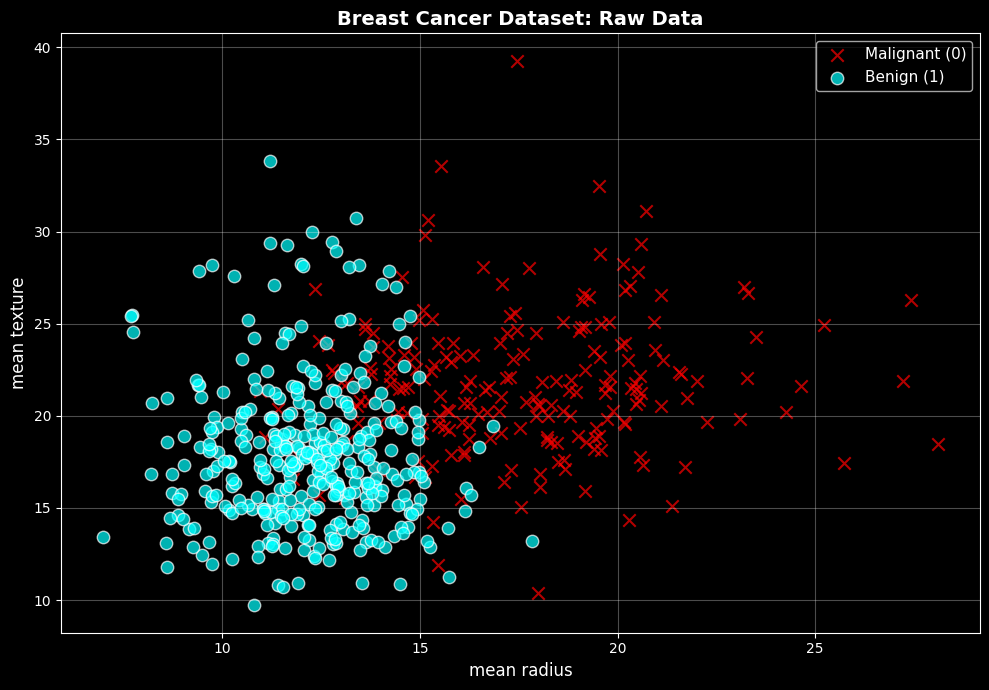

Notice: The two classes are somewhat separated, but there's overlap!
Our algorithms will try to find the best line to separate them.


In [5]:
# Plot the data
plt.figure(figsize=(10, 7), dpi=100)

# Malignant (0) in red
malignant_mask = y == 0 # if y equals 0 this would be one
plt.scatter(X[malignant_mask, 0], X[malignant_mask, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.7)

# Benign (1) in cyan
benign_mask = y == 1
plt.scatter(X[benign_mask, 0], X[benign_mask, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.7)

plt.xlabel(data.feature_names[feature_indices[0]], fontsize=12)
plt.ylabel(data.feature_names[feature_indices[1]], fontsize=12)
plt.title('Breast Cancer Dataset: Raw Data', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice: The two classes are somewhat separated, but there's overlap!")
print("Our algorithms will try to find the best line to separate them.")

### Split Data: Training vs Testing

**Why split the data?**
- **Training set (80%):** Used to train the algorithm (find the best weights)
- **Testing set (20%):** Used to evaluate how well the algorithm generalizes to new data

This is how we test if our model **truly learned** or just **memorized** the training data .. we will learn about cross validation in lecture 7 and how to split our data into training, validation ,and testing.

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  {data.target_names[label]}: {count} samples")

Training set: 455 samples
Testing set: 114 samples

Training set class distribution:
  malignant: 170 samples
  benign: 285 samples


### Feature Standardization

**Why z-score (standardize)?**
- Features have different scales (radius: 6-28, texture: 9-40)
- Gradient descent works better when features are on similar scales
- We'll use **standardization**: transform each feature to have mean=0 and std=1

**Formula:** $x_{\text{zscored}} = \frac{x - \mu}{\sigma}$

**Important:** We fit the scaler on training data only, then apply to both train and test!

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Before normalization:")
print(f"  Mean: {X_train.mean(axis=0)}")
print(f"  Std:  {X_train.std(axis=0)}")

print("\nAfter normalization:")
print(f"  Mean: {X_train_scaled.mean(axis=0)}")
print(f"  Std:  {X_train_scaled.std(axis=0)}")
print("\nNotice: Mean is now ~0 and Std is now ~1 for both features!")

Before normalization:
  Mean: [14.06721319 19.24736264]
  Std:  [3.49553212 4.40044714]

After normalization:
  Mean: [-4.31742554e-15  2.24606658e-15]
  Std:  [1. 1.]

Notice: Mean is now ~0 and Std is now ~1 for both features!


---

<div dir="rtl" style="text-align: right; font-size: 20px; font-weight: bold; margin: 20px 0;">
Part 3: Perceptron Algorithm
</div>

## Algorithm 1: Perceptron (Lecture 5)

### What is the Perceptron?

The **Perceptron** is the simplest neural network - a single neuron!

**How it works:**
1. Compute: $z = w_1 x_1 + w_2 x_2 + b$ (linear combination)
2. Predict: $\hat{y} = \begin{cases} +1 & \text{if } z \geq 0 \\ -1 & \text{if } z < 0 \end{cases}$ (step activation)
3. Update weights **only if wrong**: $w = w + \eta (y - \hat{y}) x$

**Key difference from Adaline:**
- Uses **step function** (hard decision: -1 or +1)
- Updates weights only when misclassified
- Counts **number of errors** (not continuous cost)

**Note:** Perceptron uses labels **-1** and **+1** (not 0 and 1)

In [8]:
# Convert labels: 0 -> -1, 1 -> +1 (Perceptron uses -1/+1)
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

print("Original labels (0/1):", y_train[:10])
print("Perceptron labels (-1/+1):", y_train_perceptron[:10])

Original labels (0/1): [1 0 1 1 1 1 1 1 1 1]
Perceptron labels (-1/+1): [ 1 -1  1  1  1  1  1  1  1  1]


### Perceptron Training

Run this cell and observe:
- How the decision boundary separates the two classes
- How errors decrease over epochs
- The final accuracy

In [9]:
# this is from the lecture
# Initialize weights randomly
np.random.seed(42)
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

# Hyperparameters
eta = 0.01  # Learning rate
epochs = 50  # Number of training iterations
errors = np.zeros(epochs)

# Training loop
for epoch in range(epochs):
    error_count = 0
    for i in range(len(X_train_scaled)):
        # Forward pass
        z = w1 * X_train_scaled[i, 0] + w2 * X_train_scaled[i, 1] + b
        yhat = 1 if z >= 0 else -1  # Step activation

        # Update weights only if misclassified
        if yhat != y_train_perceptron[i]:
            w1 = w1 + eta * (y_train_perceptron[i] - yhat) * X_train_scaled[i, 0]
            w2 = w2 + eta * (y_train_perceptron[i] - yhat) * X_train_scaled[i, 1]
            b = b + eta * (y_train_perceptron[i] - yhat)
            error_count += 1

    errors[epoch] = error_count

    # Stop if no errors
    if error_count == 0:
        print(f"Converged at epoch {epoch + 1}!")
        break

print(f"\nFinal weights:")
print(f"  w1 = {w1:.4f}")
print(f"  w2 = {w2:.4f}")
print(f"  b  = {b:.4f}")


Final weights:
  w1 = -0.0483
  w2 = -0.0371
  b  = 0.0077


### Visualize Perceptron Results

/tmp/ipython-input-3342332663.py:5: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],


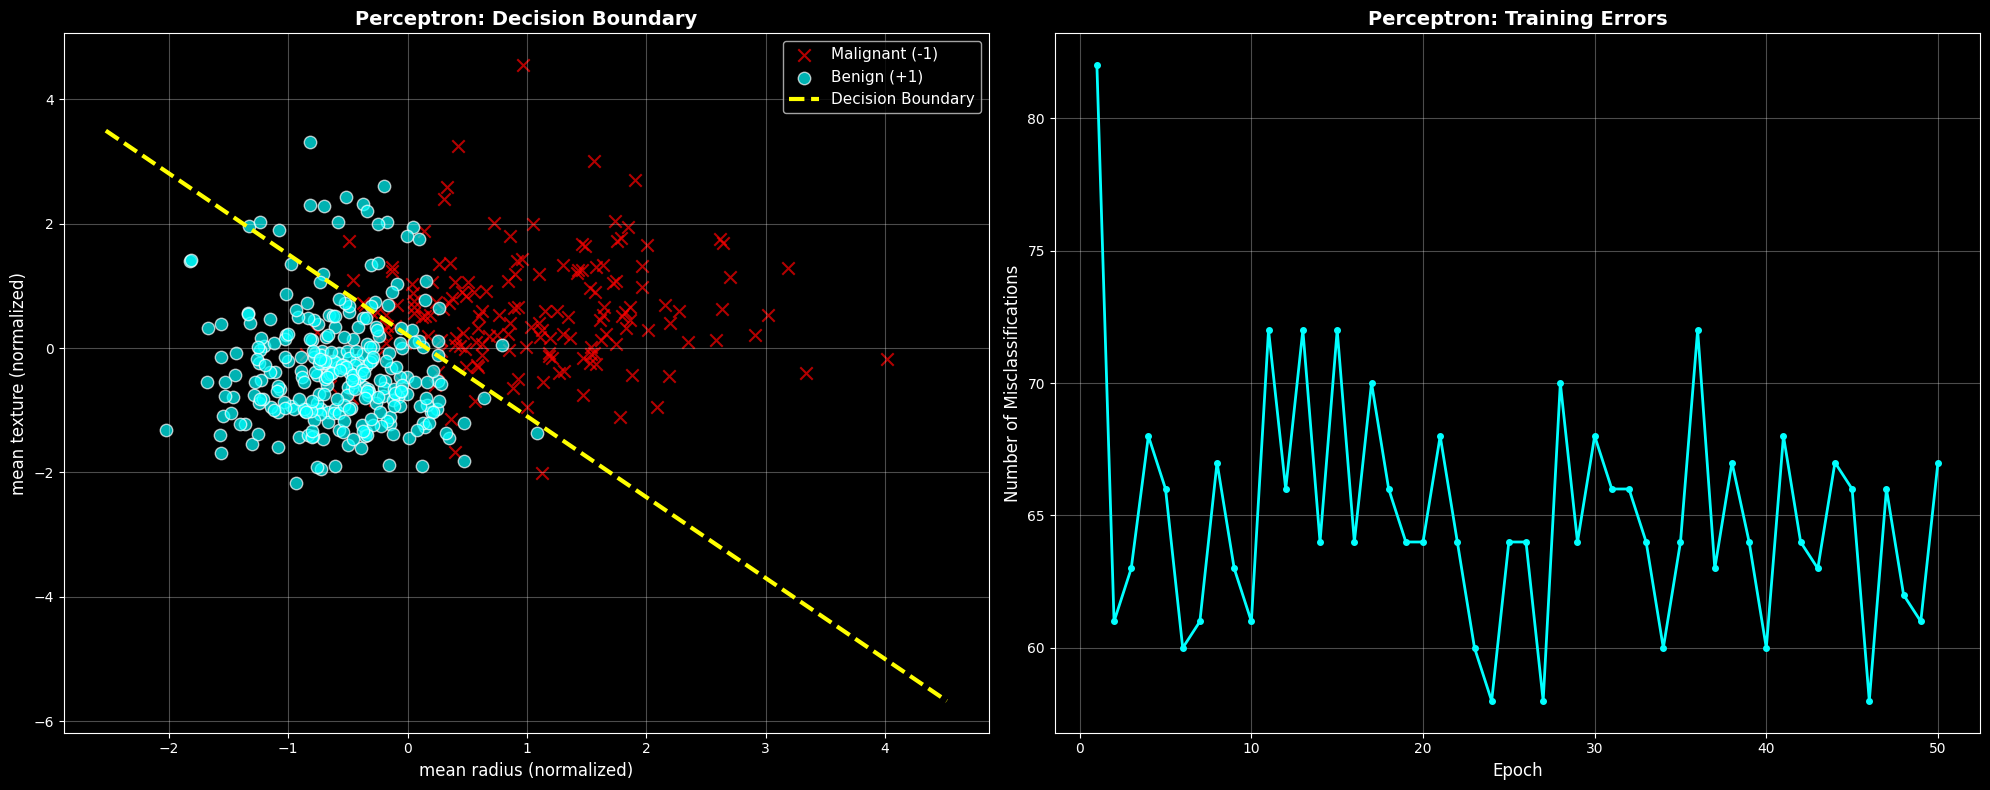

In [10]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Plot 1: Decision boundary
ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', s=80, marker='x', label='Malignant (-1)',
            edgecolors='white', linewidth=1.5, alpha=0.7)
ax1.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (+1)',
            edgecolors='white', linewidth=1, alpha=0.7)

# Plot decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x1_vals = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 100)
x2_vals = -(w1 * x1_vals + b) / w2
ax1.plot(x1_vals, x2_vals, 'yellow', linewidth=3, label='Decision Boundary', linestyle='--')

ax1.set_xlabel(data.feature_names[feature_indices[0]] + ' (normalized)', fontsize=12)
ax1.set_ylabel(data.feature_names[feature_indices[1]] + ' (normalized)', fontsize=12)
ax1.set_title('Perceptron: Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Training errors
ax2.plot(range(1, epoch + 2), errors[:epoch + 1], 'cyan', linewidth=2, marker='o', markersize=4)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Number of Misclassifications', fontsize=12)
ax2.set_title('Perceptron: Training Errors', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Evaluate Perceptron Accuracy

In [11]:
# Training accuracy
train_predictions = np.array([1 if (w1 * X_train_scaled[i, 0] + w2 * X_train_scaled[i, 1] + b) >= 0 else -1
                               for i in range(len(X_train_scaled))])
train_accuracy = np.mean(train_predictions == y_train_perceptron) * 100

# Testing accuracy
test_predictions = np.array([1 if (w1 * X_test_scaled[i, 0] + w2 * X_test_scaled[i, 1] + b) >= 0 else -1
                              for i in range(len(X_test_scaled))])
test_accuracy = np.mean(test_predictions == y_test_perceptron) * 100

print("="*60)
print("PERCEPTRON RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy:  {test_accuracy:.2f}%")
print(f"\nTraining stopped at epoch: {epoch + 1}/{epochs}")
print("="*60)

PERCEPTRON RESULTS
Training Accuracy: 87.91%
Testing Accuracy:  85.09%

Training stopped at epoch: 50/50


---

<div dir="rtl" style="text-align: right; font-size: 20px; font-weight: bold; margin: 20px 0;">
Part 4: Adaline Algorithm
</div>

## Algorithm 2: Adaline - Adaptive Linear Neuron (Lecture 5)

### What is Adaline?

**Adaline** improves on the Perceptron by using a **continuous cost function**!

**How it works:**
1. Compute: $z = w_1 x_1 + w_2 x_2 + b$ (linear activation)
2. Cost: MSE
3. Update weights using **gradient descent** (always updates, not just when wrong)

**Key differences from Perceptron:**
- Uses **linear activation** (continuous output)
- Updates weights with GD
- Minimizes **continuous cost** (MSE, not error count)
- More stable convergence

**Note:** Adaline also uses labels **-1** and **+1**

In [12]:
# Labels already converted for Perceptron (-1/+1), we'll reuse them
print("Adaline uses the same label encoding as Perceptron: -1 and +1")
print(f"Training labels: {y_train_perceptron[:10]}")

Adaline uses the same label encoding as Perceptron: -1 and +1
Training labels: [ 1 -1  1  1  1  1  1  1  1  1]


### Adaline Training

Run this cell and observe:
- How cost decreases smoothly (unlike step-like errors in Perceptron)
- Matrix operations (more efficient than loops)
- The decision boundary

In [13]:
# Add bias term to features (matrix form)
X_train_bias = np.column_stack([np.ones(len(X_train_scaled)), X_train_scaled])
X_test_bias = np.column_stack([np.ones(len(X_test_scaled)), X_test_scaled])

# Initialize weights (including bias) randomly
np.random.seed(42)
w_adaline = np.random.randn(3) * 0.01

# Hyperparameters
eta_adaline = 0.01  # Learning rate
epochs_adaline = 100  # Number of training iterations
cost_history = np.zeros(epochs_adaline)

# Training loop
for epoch in range(epochs_adaline):
    # Forward pass (linear activation)
    z = X_train_bias @ w_adaline

    # Compute error
    error = z - y_train_perceptron

    # Update weights using gradient descent
    w_adaline = w_adaline - eta_adaline * (X_train_bias.T @ error) / len(X_train_scaled)

    # Compute cost (MSE)
    cost_history[epoch] = 0.5 * np.mean(error ** 2)

# Extract weights
b_adaline = w_adaline[0]
w1_adaline = w_adaline[1]
w2_adaline = w_adaline[2]

print(f"Final weights:")
print(f"  w1 = {w1_adaline:.4f}")
print(f"  w2 = {w2_adaline:.4f}")
print(f"  b  = {b_adaline:.4f}")
print(f"\nFinal cost (SSE): {cost_history[-1]:.6f}")

Final weights:
  w1 = -0.4229
  w2 = -0.1923
  b  = 0.1621

Final cost (SSE): 0.230548


### Visualize Adaline Results

/tmp/ipython-input-867583074.py:5: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],


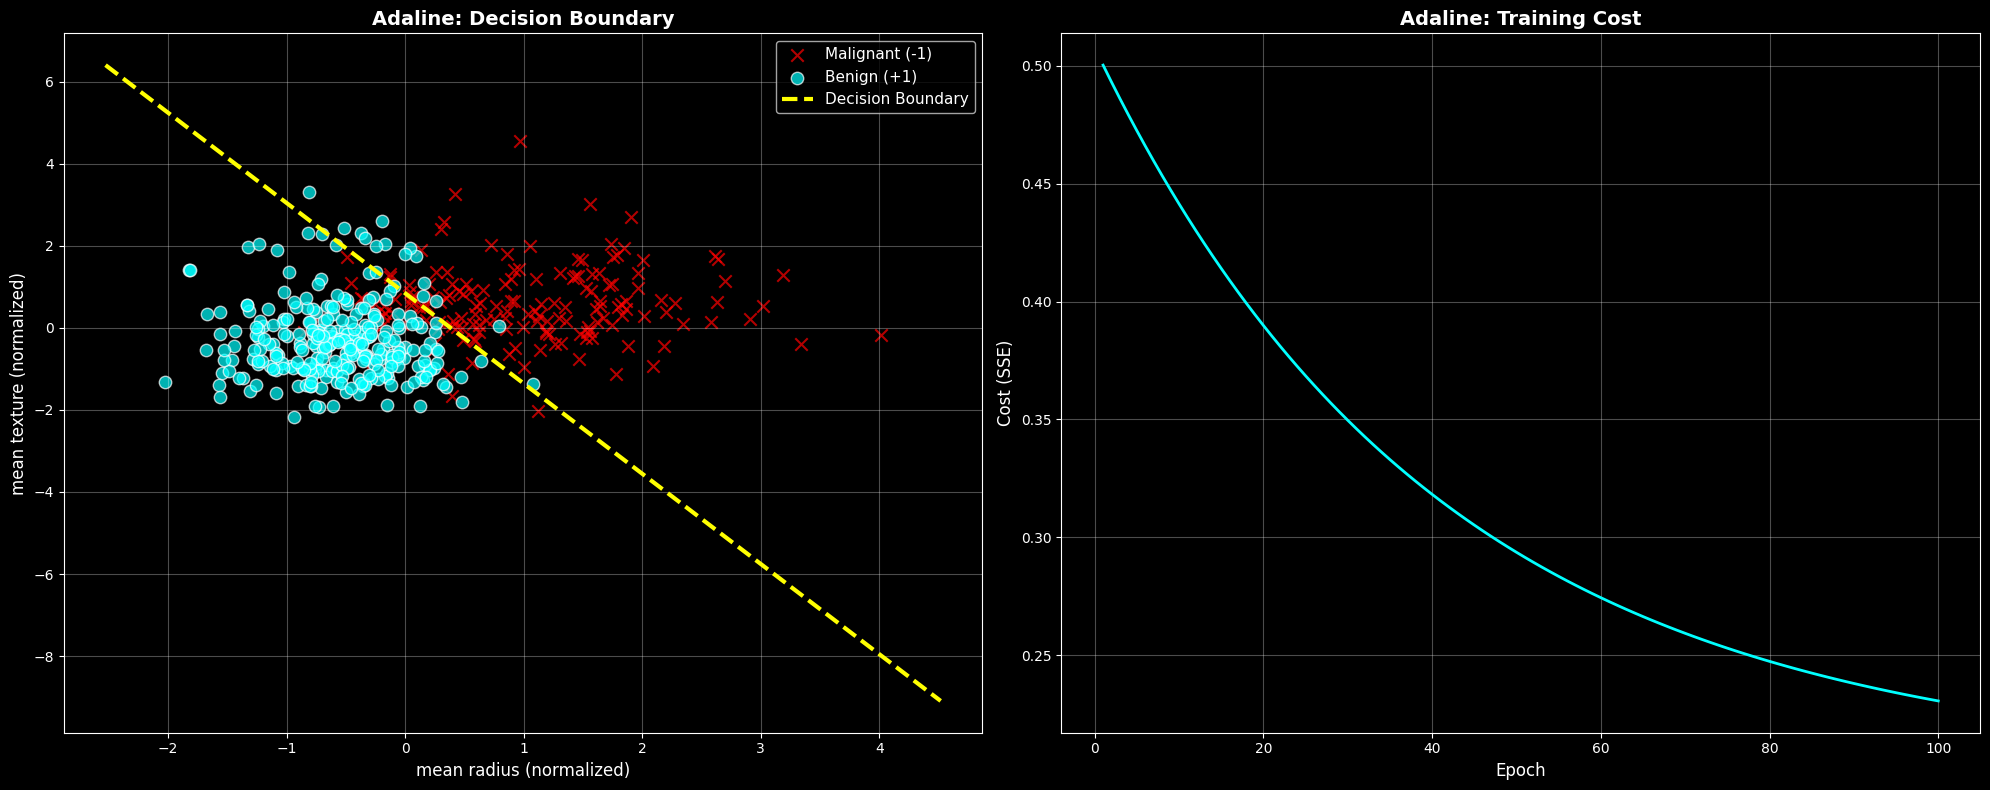

Notice: Cost decreases smoothly (unlike step-like errors in Perceptron)!


In [14]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Plot 1: Decision boundary
ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', s=80, marker='x', label='Malignant (-1)',
            edgecolors='white', linewidth=1.5, alpha=0.7)
ax1.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (+1)',
            edgecolors='white', linewidth=1, alpha=0.7)

# Plot decision boundary
x1_vals = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 100)
x2_vals = -(w1_adaline * x1_vals + b_adaline) / w2_adaline
ax1.plot(x1_vals, x2_vals, 'yellow', linewidth=3, label='Decision Boundary', linestyle='--')

ax1.set_xlabel(data.feature_names[feature_indices[0]] + ' (normalized)', fontsize=12)
ax1.set_ylabel(data.feature_names[feature_indices[1]] + ' (normalized)', fontsize=12)
ax1.set_title('Adaline: Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Cost over epochs
ax2.plot(range(1, epochs_adaline + 1), cost_history, 'cyan', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Cost (SSE)', fontsize=12)
ax2.set_title('Adaline: Training Cost', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: Cost decreases smoothly (unlike step-like errors in Perceptron)!")

### Evaluate Adaline Accuracy

In [15]:
# Training accuracy (use step function for final prediction)
train_predictions_adaline = np.where(X_train_bias @ w_adaline >= 0, 1, -1)
train_accuracy_adaline = np.mean(train_predictions_adaline == y_train_perceptron) * 100

# Testing accuracy
test_predictions_adaline = np.where(X_test_bias @ w_adaline >= 0, 1, -1)
test_accuracy_adaline = np.mean(test_predictions_adaline == y_test_perceptron) * 100

print("="*60)
print("ADALINE RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_adaline:.2f}%")
print(f"Testing Accuracy:  {test_accuracy_adaline:.2f}%")
print(f"\nFinal Cost (SSE): {cost_history[-1]:.6f}")
print("="*60)

ADALINE RESULTS
Training Accuracy: 88.13%
Testing Accuracy:  91.23%

Final Cost (SSE): 0.230548


---

## Algorithm 3: Logistic Regression (Lecture 6)

### What is Logistic Regression?

**Logistic Regression** is the most popular binary classification algorithm!

**How it works:**
1. Compute: $z = w_1 x_1 + w_2 x_2 + b$ (linear combination)
2. Apply: $\sigma(z) = \frac{1}{1 + e^{-z}}$ (sigmoid activation)
3. Output: Probability between 0 and 1
4. Cost: Cross-Entropy
5. Predict: $\hat{y} = 1$ if $\sigma(z) \geq 0.5$, else $\hat{y} = 0$

**Key differences:**
- Uses **sigmoid activation** (outputs probability)
- Uses **cross-entropy cost** (not MSE) remember when we talked about convex and non-convex cost surfaces in the lecture
- Labels are **0** and **1** (not -1 and +1)
- Gives probabilistic predictions!

### Why Sigmoid?

The **sigmoid function** squashes any number to the range [0, 1]:
- Large positive $z$ → $\sigma(z) \approx 1$ (high confidence: class 1)
- Large negative $z$ → $\sigma(z) \approx 0$ (high confidence: class 0)
- $z = 0$ → $\sigma(z) = 0.5$ (uncertain .. on the boundary)

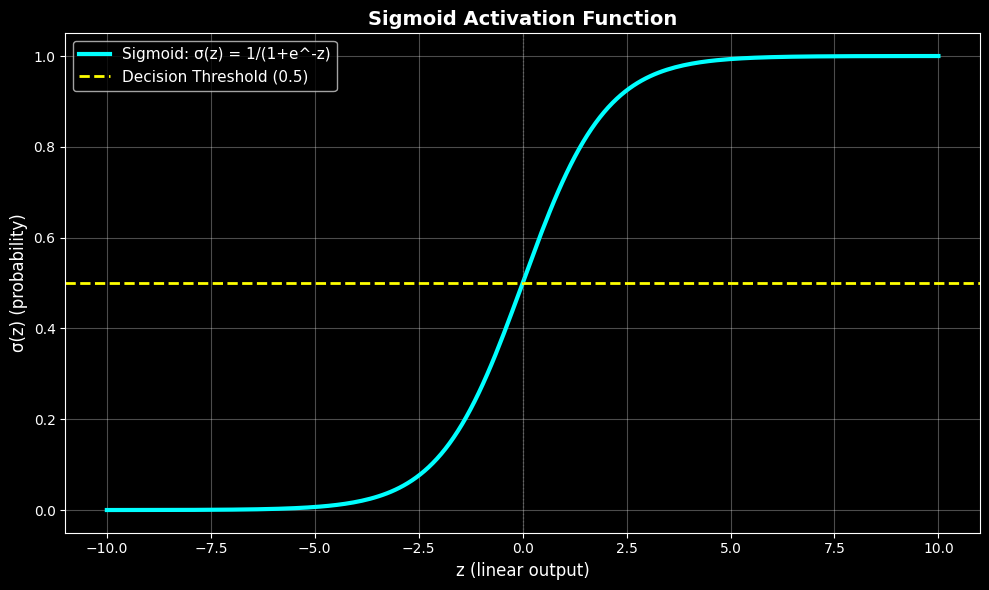

Sigmoid transforms linear output z to probability:
  z = -5 → σ(z) = 0.0067 (very likely class 0)
  z =  0 → σ(z) = 0.5000 (uncertain)
  z = +5 → σ(z) = 0.9933 (very likely class 1)


In [16]:
# Visualize the sigmoid function
z_vals = np.linspace(-10, 10, 200)
sigmoid_vals = 1 / (1 + np.exp(-z_vals))

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(z_vals, sigmoid_vals, 'cyan', linewidth=3, label='Sigmoid: σ(z) = 1/(1+e^-z)')
plt.axhline(y=0.5, color='yellow', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.xlabel('z (linear output)', fontsize=12)
plt.ylabel('σ(z) (probability)', fontsize=12)
plt.title('Sigmoid Activation Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Sigmoid transforms linear output z to probability:")
print(f"  z = -5 → σ(z) = {1/(1+np.exp(5)):.4f} (very likely class 0)")
print(f"  z =  0 → σ(z) = {1/(1+np.exp(0)):.4f} (uncertain)")
print(f"  z = +5 → σ(z) = {1/(1+np.exp(-5)):.4f} (very likely class 1)")

### Logistic Regression Training

Run this cell and observe:
- How cross-entropy cost decreases
- The probabilistic decision boundary
- Final predictions with probabilities

In [17]:
# Note: Logistic Regression uses labels 0 and 1 (not -1 and +1)
# We'll use the original y_train and y_test

# Initialize weights randomly
np.random.seed(42)
w_logistic = np.random.randn(3) * 0.01

# Hyperparameters
eta_logistic = 0.1  # Learning rate (higher for logistic regression)
epochs_logistic = 1000  # Number of training iterations
cost_history_logistic = np.zeros(epochs_logistic)

# Training loop
for epoch in range(epochs_logistic):
    # Forward pass
    z = X_train_bias @ w_logistic
    h = 1 / (1 + np.exp(-z))  # Sigmoid activation

    # Compute error
    error = h - y_train

    # Update weights using gradient descent
    w_logistic = w_logistic - eta_logistic * (X_train_bias.T @ error) / len(X_train_scaled)

    # Compute cost (Cross-Entropy)
    cost_history_logistic[epoch] = -np.mean(
        y_train * np.log(h + 1e-10) + (1 - y_train) * np.log(1 - h + 1e-10)
    )

    # Early stopping if cost is very low
    if cost_history_logistic[epoch] < 1e-6:
        print(f"Converged at epoch {epoch + 1}!")
        break

# Extract weights
b_logistic = w_logistic[0]
w1_logistic = w_logistic[1]
w2_logistic = w_logistic[2]

print(f"\nFinal weights:")
print(f"  w1 = {w1_logistic:.4f}")
print(f"  w2 = {w2_logistic:.4f}")
print(f"  b  = {b_logistic:.4f}")
print(f"\nFinal cost (Cross-Entropy): {cost_history_logistic[epoch]:.6f}")


Final weights:
  w1 = -3.3677
  w2 = -0.8514
  b  = 0.6754

Final cost (Cross-Entropy): 0.256952


### Visualize Logistic Regression Results with Probability Heatmap

/tmp/ipython-input-2821281112.py:19: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],


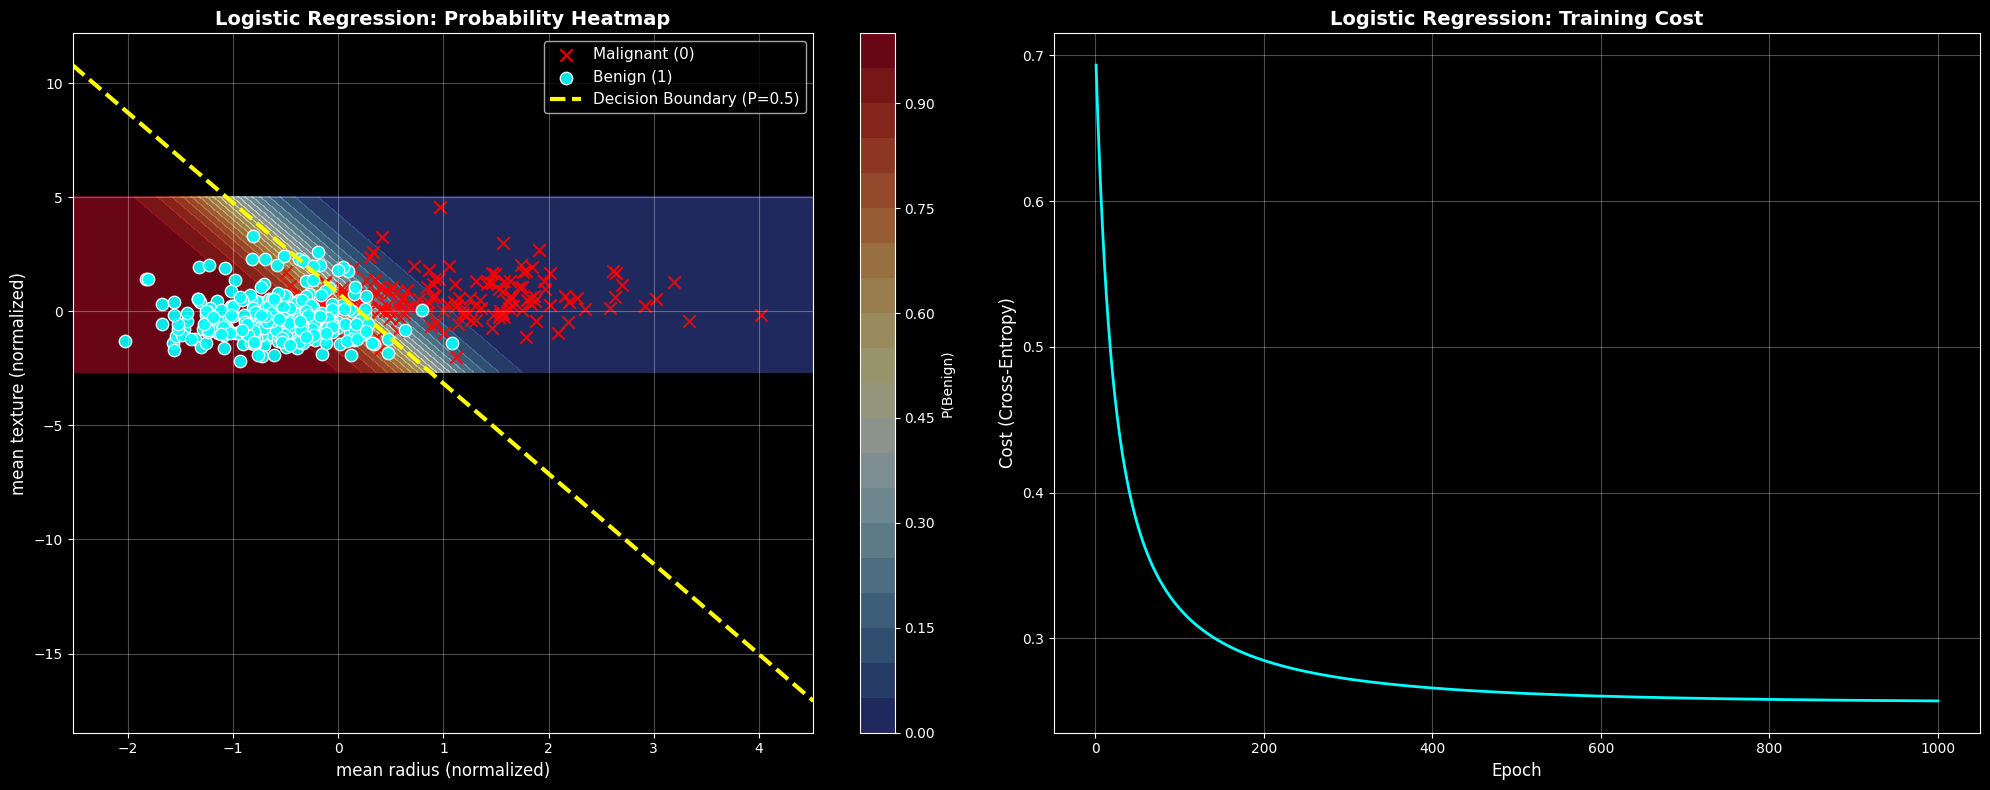

Notice: The heatmap shows probability!
  Red regions: High probability of Malignant (P(Benign) close to 0)
  Blue regions: High probability of Benign (P(Benign) close to 1)
  Yellow line: Decision boundary (P(Benign) = 0.5)


In [18]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Create a mesh grid for probability heatmap
x1_grid = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 200)
x2_grid = np.linspace(X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5, 200)
X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)
X_grid = np.column_stack([np.ones(X1_mesh.ravel().shape[0]), X1_mesh.ravel(), X2_mesh.ravel()])

# Compute probabilities for all grid points
z_grid = X_grid @ w_logistic
prob_grid = 1 / (1 + np.exp(-z_grid))

# Plot 1: Decision boundary with probability heatmap
contour = ax1.contourf(X1_mesh, X2_mesh, prob_grid.reshape(X1_mesh.shape),
                       levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, ax=ax1, label='P(Benign)')

ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.9)
ax1.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.9)

# Plot decision boundary (where probability = 0.5)
x1_vals = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 100)
x2_vals = -(w1_logistic * x1_vals + b_logistic) / w2_logistic
ax1.plot(x1_vals, x2_vals, 'yellow', linewidth=3, label='Decision Boundary (P=0.5)', linestyle='--')

ax1.set_xlabel(data.feature_names[feature_indices[0]] + ' (normalized)', fontsize=12)
ax1.set_ylabel(data.feature_names[feature_indices[1]] + ' (normalized)', fontsize=12)
ax1.set_title('Logistic Regression: Probability Heatmap', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Cost over epochs
ax2.plot(range(1, epoch + 2), cost_history_logistic[:epoch + 1], 'cyan', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Cost (Cross-Entropy)', fontsize=12)
ax2.set_title('Logistic Regression: Training Cost', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: The heatmap shows probability!")
print("  Red regions: High probability of Malignant (P(Benign) close to 0)")
print("  Blue regions: High probability of Benign (P(Benign) close to 1)")
print("  Yellow line: Decision boundary (P(Benign) = 0.5)")

### Evaluate Logistic Regression Accuracy

In [19]:
# Training accuracy
train_probs = 1 / (1 + np.exp(-(X_train_bias @ w_logistic)))
train_predictions_logistic = np.where(train_probs >= 0.5, 1, 0)
train_accuracy_logistic = np.mean(train_predictions_logistic == y_train) * 100

# Testing accuracy
test_probs = 1 / (1 + np.exp(-(X_test_bias @ w_logistic)))
test_predictions_logistic = np.where(test_probs >= 0.5, 1, 0)
test_accuracy_logistic = np.mean(test_predictions_logistic == y_test) * 100

print("="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_logistic:.2f}%")
print(f"Testing Accuracy:  {test_accuracy_logistic:.2f}%")
print(f"\nFinal Cost (Cross-Entropy): {cost_history_logistic[epoch]:.6f}")
print("="*60)

# Show some example predictions with probabilities
print("\nExample Predictions (first 5 test samples):")
print("-" * 60)
for i in range(5):
    true_label = "Benign" if y_test[i] == 1 else "Malignant"
    pred_label = "Benign" if test_predictions_logistic[i] == 1 else "Malignant"
    prob = test_probs[i] * 100
    print(f"Sample {i+1}: True={true_label:10s} | Predicted={pred_label:10s} | P(Benign)={prob:.2f}%")

LOGISTIC REGRESSION RESULTS
Training Accuracy: 89.45%
Testing Accuracy:  87.72%

Final Cost (Cross-Entropy): 0.256952

Example Predictions (first 5 test samples):
------------------------------------------------------------
Sample 1: True=Malignant  | Predicted=Malignant  | P(Benign)=0.16%
Sample 2: True=Benign     | Predicted=Benign     | P(Benign)=98.23%
Sample 3: True=Malignant  | Predicted=Malignant  | P(Benign)=47.48%
Sample 4: True=Benign     | Predicted=Malignant  | P(Benign)=18.49%
Sample 5: True=Malignant  | Predicted=Malignant  | P(Benign)=0.08%


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train_scaled)
y_train_torch = torch.FloatTensor(y_train).unsqueeze(1)  # Shape: (n, 1) so we will ensure we have one column containing labels
X_test_torch = torch.FloatTensor(X_test_scaled)
y_test_torch = torch.FloatTensor(y_test).unsqueeze(1)

# Define Logistic Regression model
class LogisticRegressionPyTorch(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPyTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 2 features -> 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z = self.linear(x)  # Linear combination
        h = self.sigmoid(z)  # Sigmoid activation
        return h

# Initialize model
torch.manual_seed(42)
model_pytorch = LogisticRegressionPyTorch(input_dim=2)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model_pytorch.parameters(), lr=0.1)

# Training loop
epochs_pytorch = 1000
cost_history_pytorch = []

for epoch in range(epochs_pytorch):
    # Forward pass
    outputs = model_pytorch(X_train_torch)
    loss = criterion(outputs, y_train_torch)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients automatically! .. Note that we didn't get the equations ourselves, this is algorithmic differentiation that we mentioned in lecture 6
    optimizer.step()  # Update weights

    cost_history_pytorch.append(loss.item())

    if loss.item() < 1e-6:
        print(f"Converged at epoch {epoch + 1}!")
        break

# Get learned weights
w_pytorch = model_pytorch.linear.weight.data.numpy().flatten()
b_pytorch = model_pytorch.linear.bias.data.numpy()[0]

print(f"\nFinal weights (PyTorch):")
print(f"  w1 = {w_pytorch[0]:.4f}")
print(f"  w2 = {w_pytorch[1]:.4f}")
print(f"  b  = {b_pytorch:.4f}")
print(f"\nFinal loss: {cost_history_pytorch[-1]:.6f}")

# Evaluate accuracy
with torch.no_grad():  # No gradient computation needed for evaluation
    train_probs_pytorch = model_pytorch(X_train_torch).numpy()
    train_preds_pytorch = (train_probs_pytorch >= 0.5).astype(int).flatten()
    train_accuracy_pytorch = np.mean(train_preds_pytorch == y_train) * 100

    test_probs_pytorch = model_pytorch(X_test_torch).numpy()
    test_preds_pytorch = (test_probs_pytorch >= 0.5).astype(int).flatten()
    test_accuracy_pytorch = np.mean(test_preds_pytorch == y_test) * 100

print("\n" + "="*60)
print("PYTORCH LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_pytorch:.2f}%")
print(f"Testing Accuracy:  {test_accuracy_pytorch:.2f}%")
print("="*60)

print("\nNotice: PyTorch gives similar results but with much less code!")
print("PyTorch automatically computes gradients - no manual math needed!")


Final weights (PyTorch):
  w1 = -3.3616
  w2 = -0.8507
  b  = 0.6753

Final loss: 0.256990

PYTORCH LOGISTIC REGRESSION RESULTS
Training Accuracy: 89.45%
Testing Accuracy:  87.72%

Notice: PyTorch gives similar results but with much less code!
PyTorch automatically computes gradients - no manual math needed!


---

## Algorithm 4: Logistic Regression with PyTorch

### Introduction to PyTorch

**PyTorch** is a modern deep learning framework that makes implementing neural networks much easier!

**Why PyTorch?**
- Automatic gradient computation (no manual derivatives!)
- GPU acceleration for faster training
- Industry standard for deep learning

Let's implement **the same Logistic Regression** using PyTorch!

---

## Algorithm 5: Deep Neural Network (MLP) with PyTorch

### What is a Deep Neural Network?

Now let's go beyond simple linear models! We'll build a **Deep Neural Network** with **multiple hidden layers**.

**Architecture:**
- **Input Layer:** 2 features (mean radius + mean texture)
- **Hidden Layer 1:** 2 neurons with ReLU activation
- **Hidden Layer 2:** 2 neurons with ReLU activation
- **Output Layer:** 1 neuron with Sigmoid activation

**Total:** Input(2) → Hidden1(2, ReLU) → Hidden2(2, ReLU) → Output(1, Sigmoid)

### Is this an MLP? Is it Deep?

✅ **Yes, this is an MLP (Multi-Layer Perceptron)**  
- MLP means fully connected layers (every neuron connects to all neurons in the next layer)

✅ **Yes, this is a Deep Network**  
- "Deep" typically means ≥ 2 hidden layers

### What's ReLU?

**ReLU (Rectified Linear Unit):** $f(x) = \max(0, x)$
- Outputs $x$ if $x > 0$, otherwise outputs $0$
- Introduces non-linearity (can learn complex patterns!)
- Most popular activation for hidden layers

Check its shape that we mentioned in the last part of lecture 6

Let's see if the deep network outperforms simple logistic regression!

In [21]:
# Define Deep Neural Network (MLP)
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(DeepNeuralNetwork, self).__init__()
        # Define layers: 2 -> 2 -> 2 -> 1
        self.fc1 = nn.Linear(input_dim, 2)  # Hidden layer 1: input -> 2
        self.fc2 = nn.Linear(2, 2)          # Hidden layer 2: 2 -> 2
        self.fc3 = nn.Linear(2, 1)          # Output layer: 2 -> 1

        # Activation functions
        self.relu = nn.ReLU()               # ReLU for hidden layers
        self.sigmoid = nn.Sigmoid()         # Sigmoid for output layer

    def forward(self, x):
        # Forward pass through all layers
        x = self.relu(self.fc1(x))  # Hidden layer 1 + ReLU
        x = self.relu(self.fc2(x))  # Hidden layer 2 + ReLU
        x = self.sigmoid(self.fc3(x))  # Output layer + Sigmoid
        # i want you to notice the pattern and how each x from a previous line is fed to the new line
        return x

# Initialize model
torch.manual_seed(42)
model_dnn = DeepNeuralNetwork(input_dim=2)

# Count parameters
total_params = sum(p.numel() for p in model_dnn.parameters())
print(f"Deep Neural Network Architecture:")
print(f"  Input(2) → Hidden1(2, ReLU) → Hidden2(2, ReLU) → Output(1, Sigmoid)")
print(f"  Total trainable parameters: {total_params}")
print(f"  Hidden layers: 2 (this is a DEEP network!)\n")

# Loss function and optimizer
criterion_dnn = nn.BCELoss()
optimizer_dnn = optim.Adam(model_dnn.parameters(), lr=0.01)  # Adam optimizer (better than SGD)

# Training loop
epochs_dnn = 2000
cost_history_dnn = []

for epoch in range(epochs_dnn):
    # Forward pass
    outputs = model_dnn(X_train_torch)
    loss = criterion_dnn(outputs, y_train_torch)

    # Backward pass and optimization
    optimizer_dnn.zero_grad()
    loss.backward()  # Backpropagation through all layers!
    optimizer_dnn.step()

    cost_history_dnn.append(loss.item())

    if loss.item() < 1e-6:
        print(f"Converged at epoch {epoch + 1}!")
        break

print(f"\nFinal loss: {cost_history_dnn[-1]:.6f}")

# Evaluate accuracy
with torch.no_grad():
    train_probs_dnn = model_dnn(X_train_torch).numpy()
    train_preds_dnn = (train_probs_dnn >= 0.5).astype(int).flatten()
    train_accuracy_dnn = np.mean(train_preds_dnn == y_train) * 100

    test_probs_dnn = model_dnn(X_test_torch).numpy()
    test_preds_dnn = (test_probs_dnn >= 0.5).astype(int).flatten()
    test_accuracy_dnn = np.mean(test_preds_dnn == y_test) * 100

print("\n" + "="*60)
print("DEEP NEURAL NETWORK (MLP) RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_dnn:.2f}%")
print(f"Testing Accuracy:  {test_accuracy_dnn:.2f}%")
print("="*60)

print("\nKey Insights:")
print("  - Deep networks can learn NON-LINEAR decision boundaries")
print("  - Multiple hidden layers allow learning complex patterns")
print("  - ReLU activation enables non-linear transformations")
print("  - May achieve better accuracy than linear models!")

Deep Neural Network Architecture:
  Input(2) → Hidden1(2, ReLU) → Hidden2(2, ReLU) → Output(1, Sigmoid)
  Total trainable parameters: 15
  Hidden layers: 2 (this is a DEEP network!)


Final loss: 0.255335

DEEP NEURAL NETWORK (MLP) RESULTS
Training Accuracy: 89.89%
Testing Accuracy:  87.72%

Key Insights:
  - Deep networks can learn NON-LINEAR decision boundaries
  - Multiple hidden layers allow learning complex patterns
  - ReLU activation enables non-linear transformations
  - May achieve better accuracy than linear models!


### Visualize Deep Neural Network Results

/tmp/ipython-input-2103340531.py:20: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],


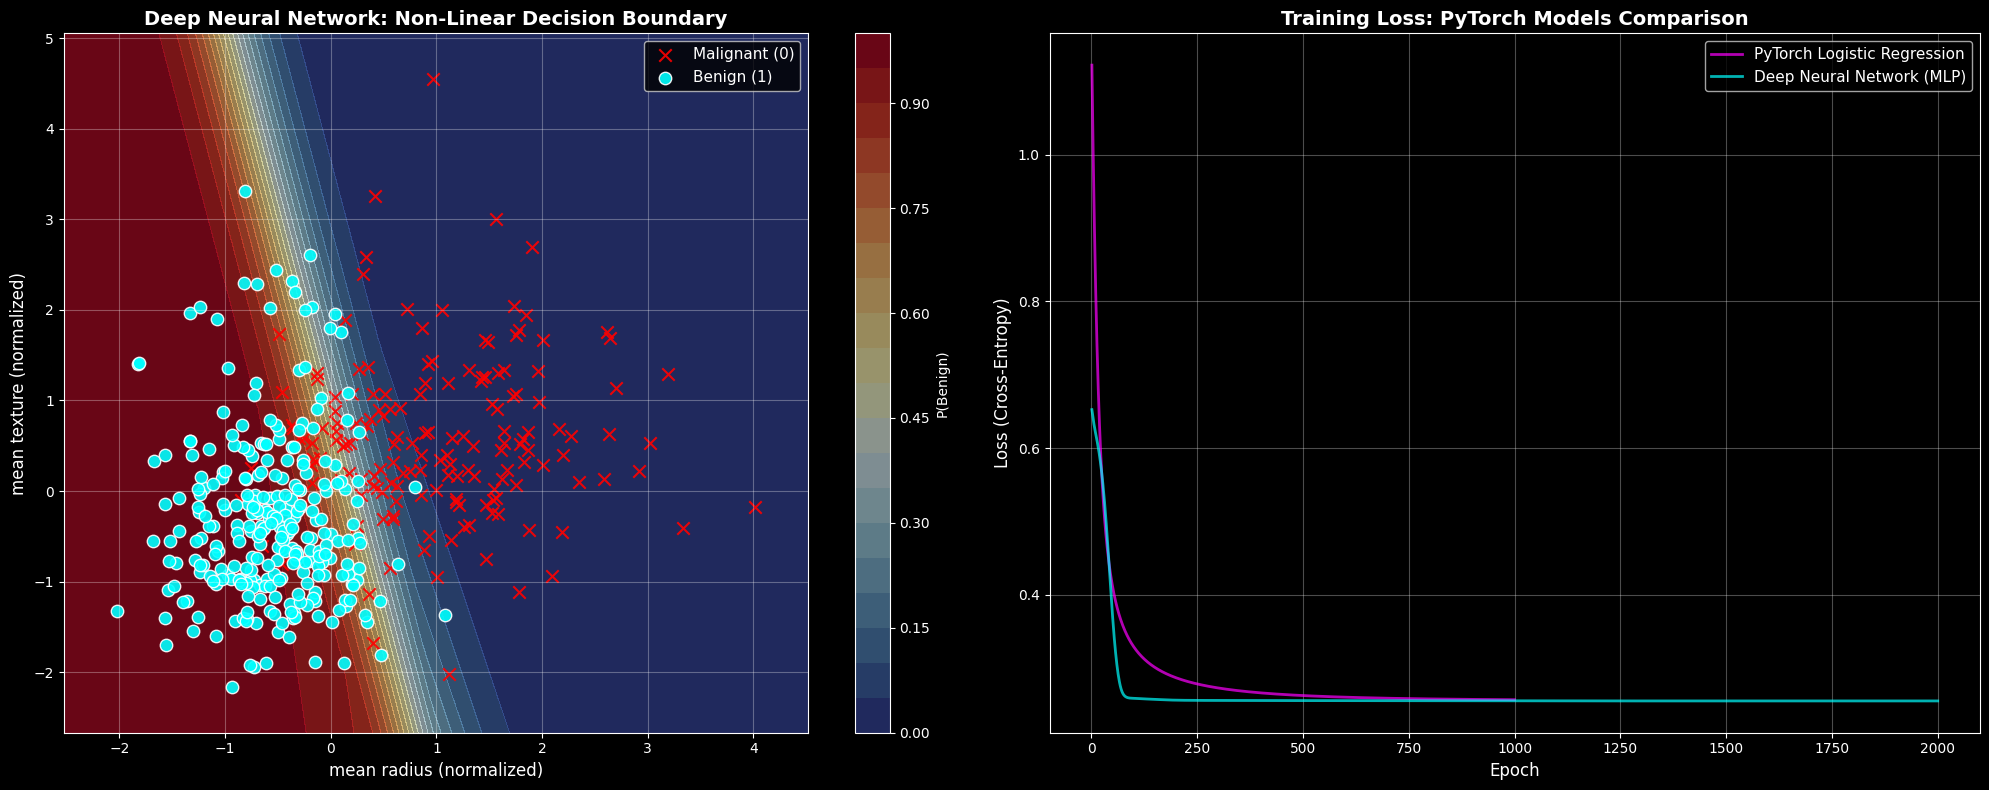

Notice: The Deep Network can learn NON-LINEAR boundaries!
The decision boundary is more flexible than a straight line.


In [22]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Create mesh grid for decision boundary
x1_grid = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 200)
x2_grid = np.linspace(X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5, 200)
X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)
X_grid_torch = torch.FloatTensor(np.column_stack([X1_mesh.ravel(), X2_mesh.ravel()]))

# Compute probabilities using DNN
with torch.no_grad():
    prob_grid_dnn = model_dnn(X_grid_torch).numpy()

# Plot 1: Decision boundary with probability heatmap
contour = ax1.contourf(X1_mesh, X2_mesh, prob_grid_dnn.reshape(X1_mesh.shape),
                       levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, ax=ax1, label='P(Benign)')

# Plot scatter points
ax1.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.9)
ax1.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.9)

ax1.set_xlabel(data.feature_names[feature_indices[0]] + ' (normalized)', fontsize=12)
ax1.set_ylabel(data.feature_names[feature_indices[1]] + ' (normalized)', fontsize=12)
ax1.set_title('Deep Neural Network: Non-Linear Decision Boundary', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Training cost comparison
ax2.plot(range(1, len(cost_history_pytorch) + 1), cost_history_pytorch,
         'magenta', linewidth=2, label='PyTorch Logistic Regression', alpha=0.7)
ax2.plot(range(1, len(cost_history_dnn) + 1), cost_history_dnn,
         'cyan', linewidth=2, label='Deep Neural Network (MLP)', alpha=0.7)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss (Cross-Entropy)', fontsize=12)
ax2.set_title('Training Loss: PyTorch Models Comparison', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: The Deep Network can learn NON-LINEAR boundaries!")
print("The decision boundary is more flexible than a straight line.")

---

## Comparison: All 5 Algorithms

Let's compare all algorithms we've learned today!

In [23]:
# Summary table with all 5 algorithms
print("="*110)
print("COMPARISON: ALL ALGORITHMS")
print("="*110)
print(f"{'Algorithm':<30} {'Train Acc':<12} {'Test Acc':<12} {'Key Feature':<50}")
print("-"*110)
print(f"{'1. Perceptron':<30} {train_accuracy:.2f}%      {test_accuracy:.2f}%      {'Step activation, error count':<50}")
print(f"{'2. Adaline':<30} {train_accuracy_adaline:.2f}%      {test_accuracy_adaline:.2f}%      {'Linear activation, SSE cost':<50}")
print(f"{'3. Logistic Regression':<30} {train_accuracy_logistic:.2f}%      {test_accuracy_logistic:.2f}%      {'Sigmoid activation, Cross-Entropy cost':<50}")
print(f"{'4. PyTorch Logistic Reg':<30} {train_accuracy_pytorch:.2f}%      {test_accuracy_pytorch:.2f}%      {'Same as #3 but with PyTorch (automatic gradients)':<50}")
print(f"{'5. Deep Neural Network':<30} {train_accuracy_dnn:.2f}%      {test_accuracy_dnn:.2f}%      {'MLP: 3 hidden layers, ReLU, non-linear boundaries':<50}")
print("="*110)

print("\nKey Takeaways:")
print("  1. Algorithms 1-3: Simple linear classifiers (from scratch)")
print("  2. Algorithm 4: Same as #3 but using modern PyTorch framework")
print("  3. Algorithm 5: DEEP network with 3 hidden layers (can learn non-linear patterns!)")
print("  4. Logistic Regression gives probabilistic predictions (most interpretable)")
print("  5. Deep Neural Networks can capture complex, non-linear relationships .. you don't necessarily get the highest classification !")


COMPARISON: ALL ALGORITHMS
Algorithm                      Train Acc    Test Acc     Key Feature                                       
--------------------------------------------------------------------------------------------------------------
1. Perceptron                  87.91%      85.09%      Step activation, error count                      
2. Adaline                     88.13%      91.23%      Linear activation, SSE cost                       
3. Logistic Regression         89.45%      87.72%      Sigmoid activation, Cross-Entropy cost            
4. PyTorch Logistic Reg        89.45%      87.72%      Same as #3 but with PyTorch (automatic gradients) 
5. Deep Neural Network         89.89%      87.72%      MLP: 3 hidden layers, ReLU, non-linear boundaries 

Key Takeaways:
  1. Algorithms 1-3: Simple linear classifiers (from scratch)
  2. Algorithm 4: Same as #3 but using modern PyTorch framework
  3. Algorithm 5: DEEP network with 3 hidden layers (can learn non-linear patterns

### Visual Comparison of Decision Boundaries

/tmp/ipython-input-2879743778.py:30: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],


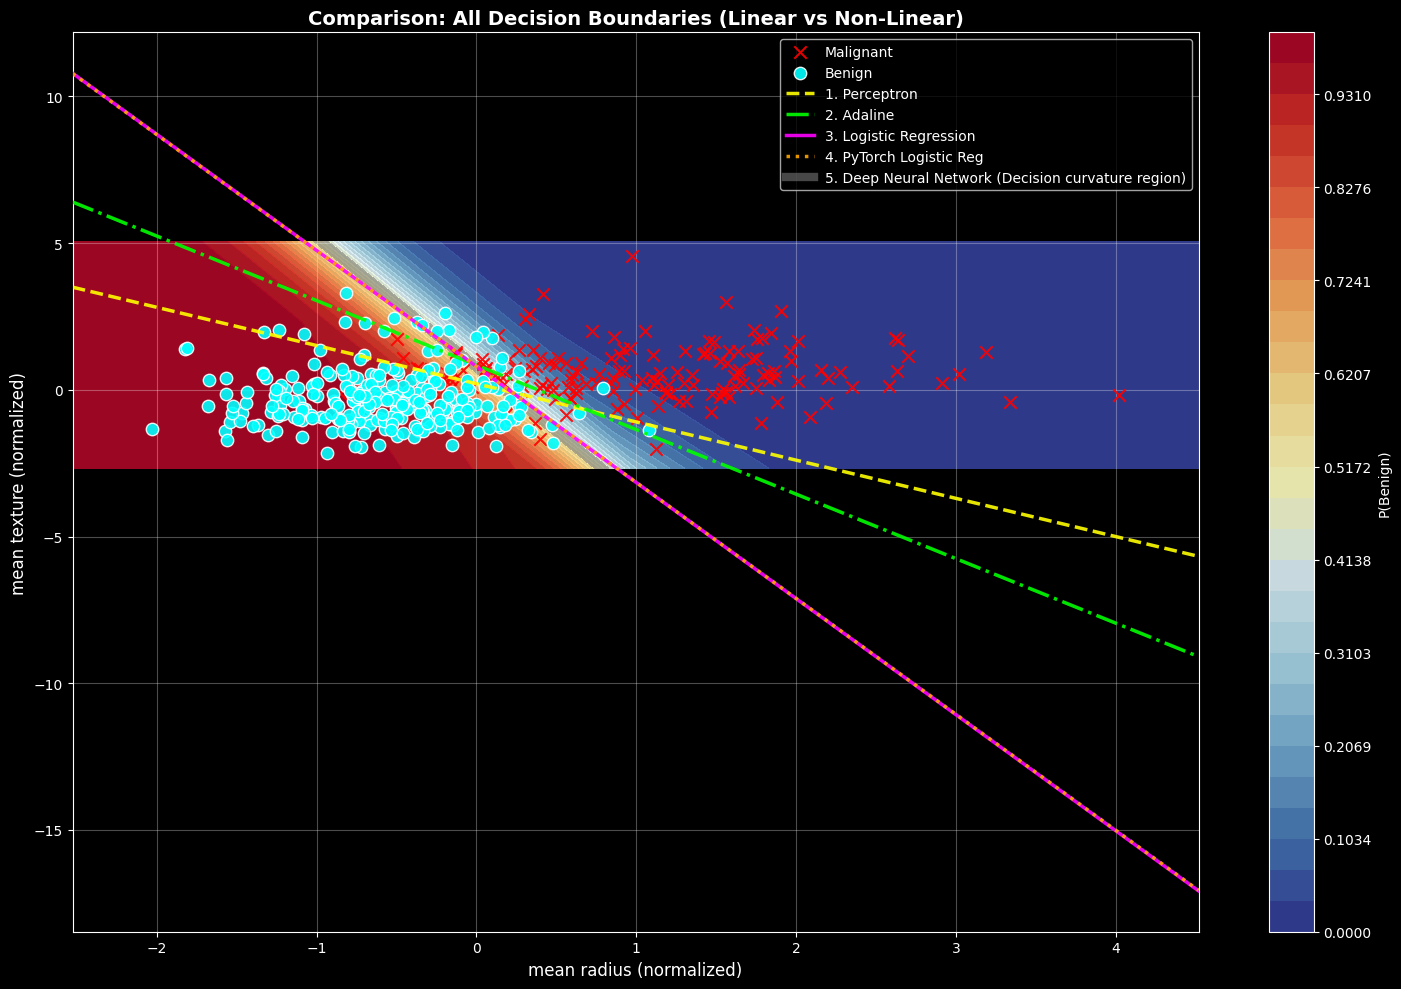

Notice:
  - The background heatmap shows the full probability space (color contours).
  - The dark grey band (Algorithm 5) highlights the non-linear curvature of the 0.5 decision region.
  - Algorithms 1-4: All linear boundaries (straight lines, very similar!)
  - Linear models work well when classes are linearly separable
  - Deep networks shine when data has complex, non-linear patterns


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Plot all decision boundaries together (including PyTorch models)
plt.figure(figsize=(15, 10), dpi=100)

# Create mesh grid for neural network boundaries
x1_grid = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 300)
x2_grid = np.linspace(X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5, 300)
X1_mesh, X2_mesh = np.meshgrid(x1_grid, x2_grid)
X_grid_torch = torch.FloatTensor(np.column_stack([X1_mesh.ravel(), X2_mesh.ravel()]))

# Get DNN probabilities for background
with torch.no_grad():
    prob_grid_dnn_bg = model_dnn(X_grid_torch).numpy()

# 1. Plot DNN decision regions as a continuous probability heatmap background
contour_bg = plt.contourf(X1_mesh, X2_mesh, prob_grid_dnn_bg.reshape(X1_mesh.shape),
                          levels=np.linspace(0, 1, 30), cmap='RdYlBu_r', alpha=0.9)
plt.colorbar(contour_bg, label='P(Benign)')

# 2. Plot the curvature around the 0.5 decision boundary to visualize the boundary area decision
# This fills the area between 0.45 and 0.55 to highlight the non-linear separation region
# Note that here we make it wider so not exactly at 0.5 but this is to show the area in a clearer way
contour_band = plt.contourf(X1_mesh, X2_mesh, prob_grid_dnn_bg.reshape(X1_mesh.shape),
                            levels=[0.45, 0.55], colors=['#777777'], alpha=0.6, zorder=1) # Dark Grey

# Plot data points - high zorder
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1],
            c='red', s=80, marker='x', label='Malignant',
            edgecolors='white', linewidth=1.5, alpha=0.9, zorder=3)
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1],
            c='cyan', s=80, marker='o', label='Benign',
            edgecolors='white', linewidth=1, alpha=0.9, zorder=3)

# Plot linear decision boundaries - very high zorder
x1_vals = np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 100)

# Perceptron boundary
x2_perceptron = -(w1 * x1_vals + b) / w2
plt.plot(x1_vals, x2_perceptron, color='yellow', linewidth=2.5,
         label='1. Perceptron', linestyle='--', alpha=0.9, zorder=4)

# Adaline boundary
x2_adaline = -(w1_adaline * x1_vals + b_adaline) / w2_adaline
plt.plot(x1_vals, x2_adaline, color='lime', linewidth=2.5,
         label='2. Adaline', linestyle='-.', alpha=0.9, zorder=4)

# Logistic Regression boundary (from scratch)
x2_logistic = -(w1_logistic * x1_vals + b_logistic) / w2_logistic
plt.plot(x1_vals, x2_logistic, color='magenta', linewidth=2.5,
         label='3. Logistic Regression', linestyle='-', alpha=0.9, zorder=4)

# PyTorch Logistic Regression boundary
x2_pytorch = -(w_pytorch[0] * x1_vals + b_pytorch) / w_pytorch[1]
plt.plot(x1_vals, x2_pytorch, color='orange', linewidth=2.5,
         label='4. PyTorch Logistic Reg', linestyle=':', alpha=0.9, zorder=4)

plt.plot([], [], color='#777777', linewidth=6, label='5. Deep Neural Network (Decision curvature region)', alpha=0.6)

plt.xlabel(data.feature_names[feature_indices[0]] + ' (normalized)', fontsize=12)
plt.ylabel(data.feature_names[feature_indices[1]] + ' (normalized)', fontsize=12)
plt.title('Comparison: All Decision Boundaries (Linear vs Non-Linear)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3, zorder=0)
plt.tight_layout()
plt.show()

print("Notice:")
print("  - The background heatmap shows the full probability space (color contours).")
print("  - The dark grey band (Algorithm 5) highlights the non-linear curvature of the 0.5 decision region.")
print("  - Algorithms 1-4: All linear boundaries (straight lines, very similar!)")
print("  - Linear models work well when classes are linearly separable")
print("  - Deep networks shine when data has complex, non-linear patterns")

---

## Part 5: Practice Exercises

<div dir="rtl" style="background-color: #1a1a2e; padding: 15px; border-radius: 10px; border-left: 5px solid #16213e;">
<strong>دلوقتي جه دورك! طبّق اللي اتعلمته على features تانية بإذن الله</strong>
</div>

### Exercise Overview

You'll practice two skills:
1. **Exercise 1:** Implement Logistic Regression **from scratch** on 2 new features
2. **Exercise 2:** Build a **Deep Neural Network** with PyTorch using **ALL 30 features**

Let's go!

---

### Exercise 1: Logistic Regression from Scratch (2 Features)

In the demo above, we used:
- Feature 0: `mean radius`
- Feature 1: `mean texture`

Now, **your turn**: Implement Logistic Regression from scratch on **2 different features**!

**Suggested feature pairs:**
1. Features [20, 21]: `worst radius` + `worst texture`
2. Features [0, 2]: `mean radius` + `mean perimeter`
3. Features [7, 27]: `mean area` + `worst area`
4. Any two features of your choice!

**Your task:**
1. Select 2 features
2. Prepare and normalize the data
3. Implement the **full training loop** (gradient descent with sigmoid)
4. Evaluate train and test accuracy
5. Visualize the decision boundary with probability heatmap

/tmp/ipython-input-1157926801.py:95: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],


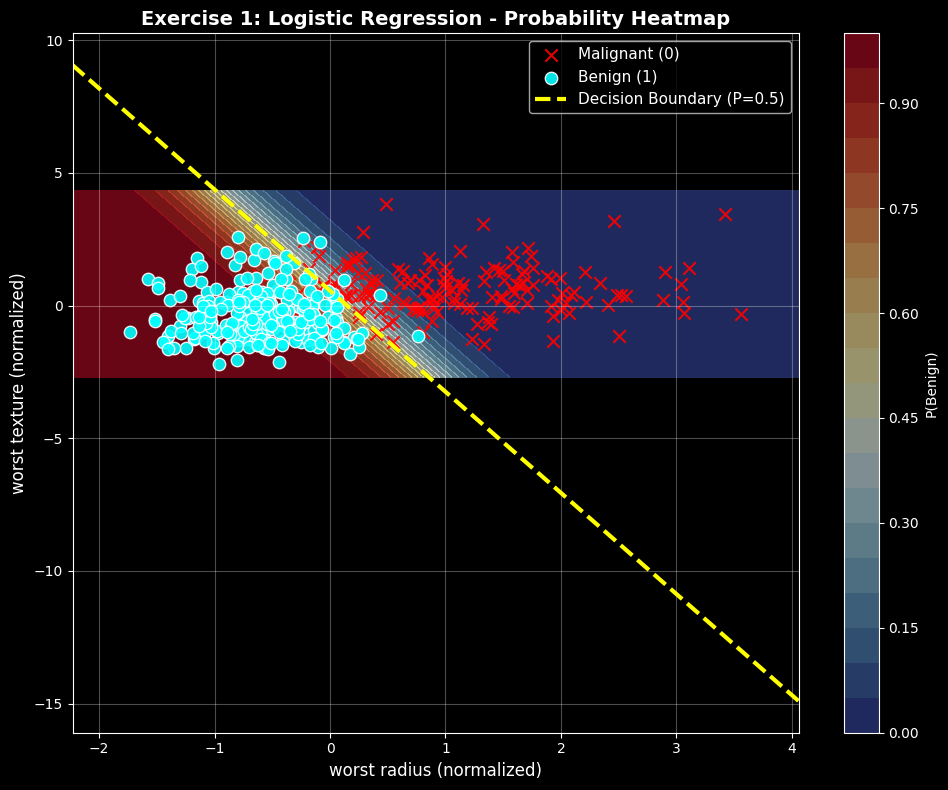

EXERCISE 1: LOGISTIC REGRESSION FROM SCRATCH
Features: worst radius
          worst texture

Training Accuracy: 94.51%
Testing Accuracy:  92.98%
Final Cost: 0.164769


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exercise 1: Logistic Regression from Scratch

# 1. Select 2 features: 'worst radius' and 'worst texture' (indices 20 and 21)
ex1_feature_indices = [20, 21]
X_ex1 = data.data[:, ex1_feature_indices]
y_ex1 = data.target

# 2. Prepare and normalize the data
X_train_ex1, X_test_ex1, y_train_ex1, y_test_ex1 = train_test_split(
    X_ex1, y_ex1, test_size=0.2, random_state=42, stratify=y_ex1
)

scaler_ex1 = StandardScaler()
X_train_scaled_ex1 = scaler_ex1.fit_transform(X_train_ex1)
X_test_scaled_ex1 = scaler_ex1.transform(X_test_ex1)

# Add bias term to features (matrix form)
X_train_bias_ex1 = np.column_stack([np.ones(len(X_train_scaled_ex1)), X_train_scaled_ex1])
X_test_bias_ex1 = np.column_stack([np.ones(len(X_test_scaled_ex1)), X_test_scaled_ex1])

# 3. Implement the full training loop (gradient descent with sigmoid)

# Initialize weights randomly
np.random.seed(42)
w_ex1 = np.random.randn(3) * 0.01

# Hyperparameters
eta_ex1 = 0.1  # Learning rate
epochs_ex1 = 1000  # Number of training iterations
cost_ex1 = np.zeros(epochs_ex1)

# Training loop
for epoch in range(epochs_ex1):
    # Forward pass
    z_ex1 = X_train_bias_ex1 @ w_ex1
    h_ex1 = 1 / (1 + np.exp(-z_ex1))  # Sigmoid activation

    # Compute error
    error_ex1 = h_ex1 - y_train_ex1

    # Update weights using gradient descent
    w_ex1 = w_ex1 - eta_ex1 * (X_train_bias_ex1.T @ error_ex1) / len(X_train_scaled_ex1)

    # Compute cost (Cross-Entropy)
    cost_ex1[epoch] = -np.mean(
        y_train_ex1 * np.log(h_ex1 + 1e-10) + (1 - y_train_ex1) * np.log(1 - h_ex1 + 1e-10)
    )

    # Early stopping if cost is very low
    if cost_ex1[epoch] < 1e-6:
        print(f"Converged at epoch {epoch + 1}!")
        break

# Extract weights
b_ex1 = w_ex1[0]
w1_ex1 = w_ex1[1]
w2_ex1 = w_ex1[2]


# 4. Evaluate train and test accuracy
# Training accuracy
train_probs_ex1 = 1 / (1 + np.exp(-(X_train_bias_ex1 @ w_ex1)))
train_predictions_ex1 = np.where(train_probs_ex1 >= 0.5, 1, 0)
train_acc_ex1 = np.mean(train_predictions_ex1 == y_train_ex1) * 100

# Testing accuracy
test_probs_ex1 = 1 / (1 + np.exp(-(X_test_bias_ex1 @ w_ex1)))
test_predictions_ex1 = np.where(test_probs_ex1 >= 0.5, 1, 0)
test_acc_ex1 = np.mean(test_predictions_ex1 == y_test_ex1) * 100


# 5. Visualize the decision boundary with probability heatmap
plt.figure(figsize=(10, 8), dpi=100)

# Create a mesh grid for probability heatmap
x1_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 200)
x2_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 1].min() - 0.5, X_train_scaled_ex1[:, 1].max() + 0.5, 200)
X1_mesh_ex1, X2_mesh_ex1 = np.meshgrid(x1_grid_ex1, x2_grid_ex1)
X_grid_ex1 = np.column_stack([np.ones(X1_mesh_ex1.ravel().shape[0]), X1_mesh_ex1.ravel(), X2_mesh_ex1.ravel()])

# Compute probabilities for all grid points
z_grid_ex1 = X_grid_ex1 @ w_ex1
prob_grid_ex1 = 1 / (1 + np.exp(-z_grid_ex1))

# Plot decision boundary with probability heatmap
contour = plt.contourf(X1_mesh_ex1, X2_mesh_ex1, prob_grid_ex1.reshape(X1_mesh_ex1.shape),
                       levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, label='P(Benign)')

plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.9)
plt.scatter(X_train_scaled_ex1[y_train_ex1 == 1, 0], X_train_scaled_ex1[y_train_ex1 == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.9)

# Plot decision boundary (where probability = 0.5)
x1_vals_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 100)
x2_vals_ex1 = -(w1_ex1 * x1_vals_ex1 + b_ex1) / w2_ex1
plt.plot(x1_vals_ex1, x2_vals_ex1, 'yellow', linewidth=3, label='Decision Boundary (P=0.5)', linestyle='--')

plt.xlabel(data.feature_names[ex1_feature_indices[0]] + ' (normalized)', fontsize=12)
plt.ylabel(data.feature_names[ex1_feature_indices[1]] + ' (normalized)', fontsize=12)
plt.title('Exercise 1: Logistic Regression - Probability Heatmap', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*70)
print("EXERCISE 1: LOGISTIC REGRESSION FROM SCRATCH")
print("="*70)
print(f"Features: {data.feature_names[ex1_feature_indices[0]]}")
print(f"          {data.feature_names[ex1_feature_indices[1]]}")
print(f"\nTraining Accuracy: {train_acc_ex1:.2f}%")
print(f"Testing Accuracy:  {test_acc_ex1:.2f}%")
print(f"Final Cost: {cost_ex1[epoch]:.6f}")
print("="*70)

---

### Exercise 2: Deep Neural Network with ALL Features (PyTorch)

Now it's time to build a **powerful deep network** using **ALL 30 features**!

**Architecture:**
- **Input Layer:** 30 features (all tumor measurements!)
- **Hidden Layer 1:** 8 neurons with ReLU
- **Hidden Layer 2:** 6 neurons with ReLU
- **Hidden Layer 3:** 4 neurons with ReLU
- **Output Layer:** 1 neuron with Sigmoid

**Total:** Input(30) → Hidden1(8, ReLU) → Hidden2(6, ReLU) → Hidden3(4, ReLU) → Output(1, Sigmoid)

**Your task:**
1. Prepare data with ALL 30 features
2. Define the neural network class with the architecture above
3. Train the network
4. Evaluate accuracy
5. Compare with Exercise 1 results

**Hint:** This network has MORE information (30 features vs 2) and MORE capacity (deeper layers). Expect better accuracy!

In [36]:
# Exercise 2: Deep Neural Network with ALL 30 Features

# YOUR CODE HERE

#raise NotImplementedError()

# Count parameters
total_params_ex2 = sum(p.numel() for p in model_ex2.parameters())

print("="*70)
print("EXERCISE 2: DEEP NEURAL NETWORK (ALL 30 FEATURES)")
print("="*70)
print(f"Architecture: 30 → 8 → 6 → 4 → 1")
print(f"Total parameters: {total_params_ex2}")
print(f"\nTraining Accuracy: {train_acc_ex2:.2f}%")
print(f"Testing Accuracy:  {test_acc_ex2:.2f}%")
print(f"Final Loss: {cost_ex2[-1]:.6f}")
print("="*70)

EXERCISE 2: DEEP NEURAL NETWORK (ALL 30 FEATURES)
Architecture: 30 → 8 → 6 → 4 → 1
Total parameters: 335

Training Accuracy: 100.00%
Testing Accuracy:  95.61%
Final Loss: 0.000360


---

### Exercise 3: Visualize and Compare Results

Create visualizations comparing your two exercises:
1. Training cost curves (Exercise 1 vs Exercise 2)
2. Accuracy comparison bar chart
3. Exercise 1 decision boundary (2D plot)

**Complete the code below:**

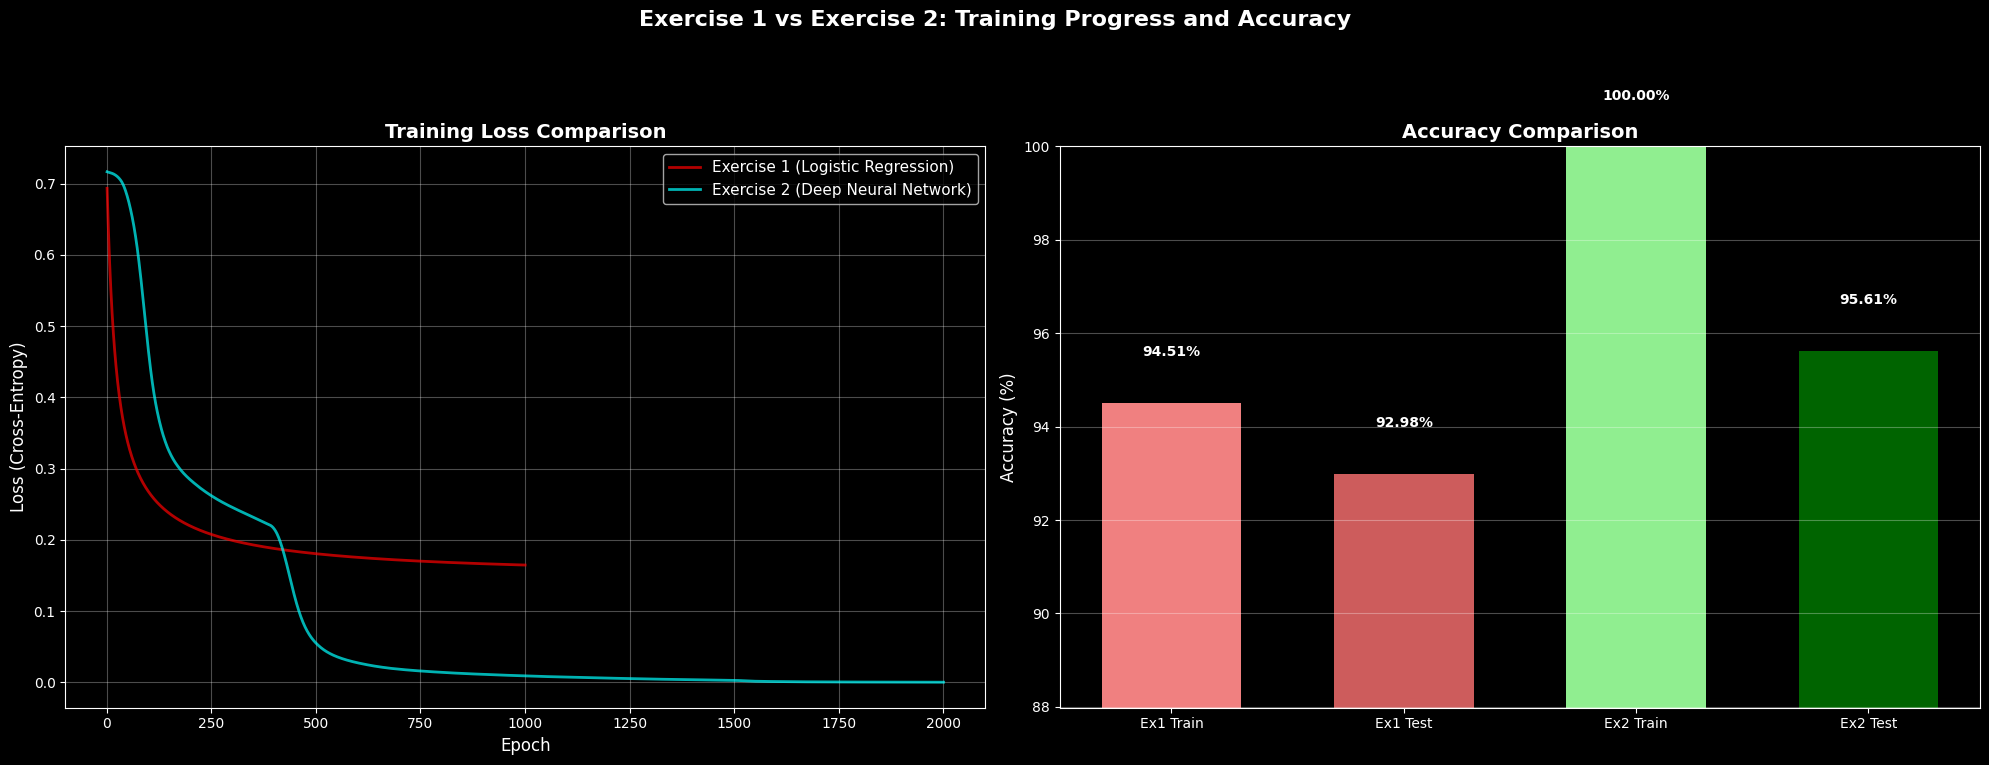

/tmp/ipython-input-622329753.py:53: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],


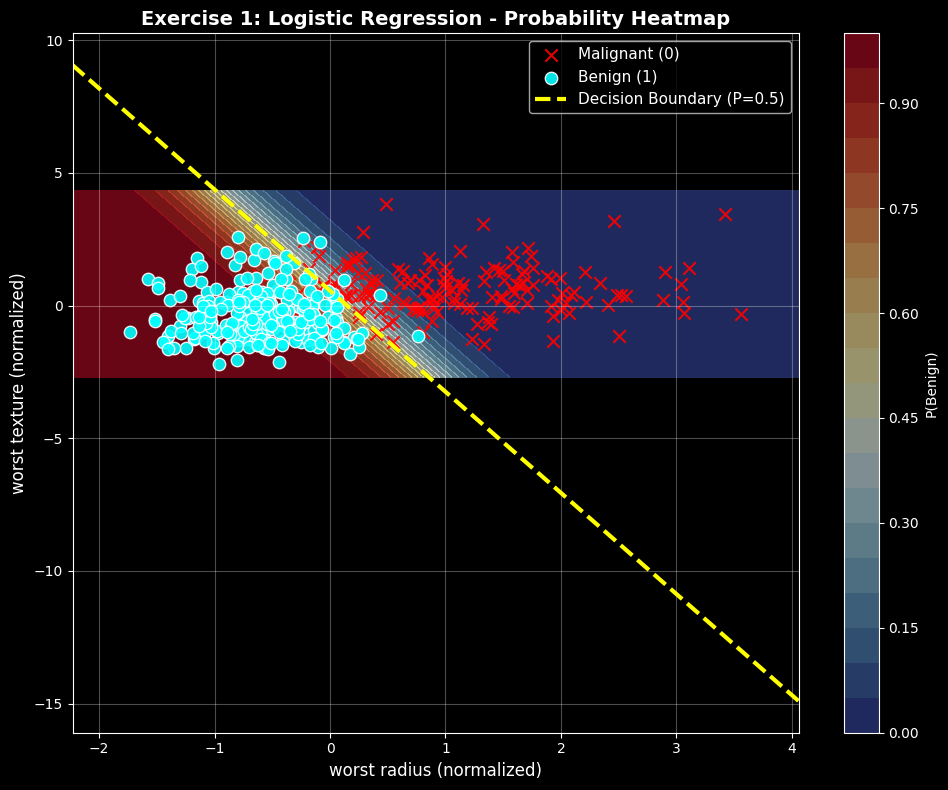


COMPARISON: EXERCISE 1 vs EXERCISE 2
Exercise 1 (2 features):   Test Accuracy = 92.98%
Exercise 2 (30 features):  Test Accuracy = 95.61%

Improvement: 2.63% better with all features!


In [37]:
import matplotlib.pyplot as plt

# Exercise 3: Visualization and Comparison

# 1. Create a figure with two subplots for cost curves and accuracy comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# 2. Plot Training Cost Curves (ax1)
ax1.plot(range(1, len(cost_ex1) + 1), cost_ex1, 'red', linewidth=2, label='Exercise 1 (Logistic Regression)', alpha=0.7)
ax1.plot(range(1, len(cost_ex2) + 1), cost_ex2, 'cyan', linewidth=2, label='Exercise 2 (Deep Neural Network)', alpha=0.7)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Cross-Entropy)', fontsize=12)
ax1.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 3. Create Accuracy Comparison Bar Chart (ax2)
labels = ['Ex1 Train', 'Ex1 Test', 'Ex2 Train', 'Ex2 Test']
accuracies = [train_acc_ex1, test_acc_ex1, train_acc_ex2, test_acc_ex2]
colors = ['lightcoral', 'indianred', 'lightgreen', 'darkgreen']

ax2.bar(labels, accuracies, color=colors, width=0.6)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim(min(accuracies) - 5, 100) # Adjust y-axis limit for better visualization
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(accuracies):
    ax2.text(i, v + 1, f'{v:.2f}%', ha='center', color='white', fontweight='bold')

# 4. Add a shared title for the entire figure
fig.suptitle('Exercise 1 vs Exercise 2: Training Progress and Accuracy', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

# 5. Create a separate figure for the Exercise 1 decision boundary
plt.figure(figsize=(10, 8), dpi=100)

# Create a mesh grid for probability heatmap for Exercise 1
x1_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 200)
x2_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 1].min() - 0.5, X_train_scaled_ex1[:, 1].max() + 0.5, 200)
X1_mesh_ex1, X2_mesh_ex1 = np.meshgrid(x1_grid_ex1, x2_grid_ex1)
X_grid_ex1 = np.column_stack([np.ones(X1_mesh_ex1.ravel().shape[0]), X1_mesh_ex1.ravel(), X2_mesh_ex1.ravel()])

# Compute probabilities for all grid points for Exercise 1
z_grid_ex1 = X_grid_ex1 @ w_ex1
prob_grid_ex1 = 1 / (1 + np.exp(-z_grid_ex1))

# Plot decision boundary with probability heatmap for Exercise 1
contour = plt.contourf(X1_mesh_ex1, X2_mesh_ex1, prob_grid_ex1.reshape(X1_mesh_ex1.shape),
                       levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, label='P(Benign)')

plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.9)
plt.scatter(X_train_scaled_ex1[y_train_ex1 == 1, 0], X_train_scaled_ex1[y_train_ex1 == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.9)

# Plot decision boundary (where probability = 0.5) for Exercise 1
x1_vals_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 100)
x2_vals_ex1 = -(w1_ex1 * x1_vals_ex1 + b_ex1) / w2_ex1
plt.plot(x1_vals_ex1, x2_vals_ex1, 'yellow', linewidth=3, label='Decision Boundary (P=0.5)', linestyle='--')

plt.xlabel(data.feature_names[ex1_feature_indices[0]] + ' (normalized)', fontsize=12)
plt.ylabel(data.feature_names[ex1_feature_indices[1]] + ' (normalized)', fontsize=12)
plt.title('Exercise 1: Logistic Regression - Probability Heatmap', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Execute the provided print statements
print("\n" + "="*70)
print("COMPARISON: EXERCISE 1 vs EXERCISE 2")
print("="*70)
print(f"Exercise 1 (2 features):   Test Accuracy = {test_acc_ex1:.2f}%")
print(f"Exercise 2 (30 features):  Test Accuracy = {test_acc_ex2:.2f}%")
print(f"\nImprovement: {test_acc_ex2 - test_acc_ex1:.2f}% better with all features!")
print("="*70)

---

## Congratulations!

<div dir="rtl" style="background-color: #1a1a2e; padding: 20px; border-radius: 10px; border-left: 5px solid #16213e; font-size: 18px;">
<strong>مبروك! خلصت  Week 4 بنجاح والحمد لله 🎉</strong>
</div>

### What You Learned Today:

✅ Applied **Perceptron** on real medical data  
✅ Applied **Adaline** with continuous cost function  
✅ Applied **Logistic Regression** with probabilistic predictions (from scratch AND PyTorch)  
✅ Built a **Deep Neural Network** with multiple hidden layers  
✅ Compared **linear vs non-linear** decision boundaries  
✅ Practiced implementing algorithms from scratch  
✅ Used **PyTorch** for modern deep learning  
✅ Saw how **all 30 features** improved accuracy

### Next Steps (Week 5):

- Data preprocessing techniques
- Model validation and cross-validation
- Regularization to prevent overfitting
- Hyperparameter tuning

Great work! You're now ready for building a more robust machine learning pipeline! 🚀

# Task
Prepare the breast cancer dataset by loading all 30 features, splitting the data into training and testing sets, and standardizing the features. Define and train a Deep Neural Network in PyTorch with the architecture: Input(30) -> Hidden1(8, ReLU) -> Hidden2(6, ReLU) -> Hidden3(4, ReLU) -> Output(1, Sigmoid). Evaluate and print the training and testing accuracies of the trained model.

## Prepare Data for DNN

### Subtask:
Load all 30 features from the breast cancer dataset, split the data into training and testing sets, and standardize the features. Convert the data to PyTorch tensors for network training.


**Reasoning**:
The subtask requires loading all 30 features, splitting the data into training and testing sets, standardizing the features, and then converting them to PyTorch tensors for network training, following the provided instructions.



In [38]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Access all 30 features and labels
X_all = data.data  # All 30 features
y_all = data.target # Labels

# 2. Split data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 3. Initialize StandardScaler
scaler_all = StandardScaler()

# 4. Fit and transform features
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

print(f"Original feature dimension: {X_all.shape[1]}")
print(f"Training set shape (scaled): {X_train_all_scaled.shape}")
print(f"Testing set shape (scaled): {X_test_all_scaled.shape}")

# 5. Convert to PyTorch tensors
X_train_torch_all = torch.FloatTensor(X_train_all_scaled)
y_train_torch_all = torch.FloatTensor(y_train_all).unsqueeze(1)
X_test_torch_all = torch.FloatTensor(X_test_all_scaled)
y_test_torch_all = torch.FloatTensor(y_test_all).unsqueeze(1)

print(f"\nPyTorch training features shape: {X_train_torch_all.shape}")
print(f"PyTorch training labels shape: {y_train_torch_all.shape}")
print(f"PyTorch testing features shape: {X_test_torch_all.shape}")
print(f"PyTorch testing labels shape: {y_test_torch_all.shape}")

print("Data prepared and converted to PyTorch tensors successfully for all 30 features!")

Original feature dimension: 30
Training set shape (scaled): (455, 30)
Testing set shape (scaled): (114, 30)

PyTorch training features shape: torch.Size([455, 30])
PyTorch training labels shape: torch.Size([455, 1])
PyTorch testing features shape: torch.Size([114, 30])
PyTorch testing labels shape: torch.Size([114, 1])
Data prepared and converted to PyTorch tensors successfully for all 30 features!


## Define Deep Neural Network

### Subtask:
Define the `DeepNeuralNetwork` class in PyTorch with the specified architecture: Input(30) -> Hidden1(8, ReLU) -> Hidden2(6, ReLU) -> Hidden3(4, ReLU) -> Output(1, Sigmoid).


**Reasoning**:
The subtask requires defining a PyTorch `DeepNeuralNetwork` class with a specific architecture. This code block will create the class as specified.



In [39]:
import torch.nn as nn

# Define Deep Neural Network (MLP) with the specified architecture
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(DeepNeuralNetwork, self).__init__()
        # Define layers: Input(30) -> Hidden1(8) -> Hidden2(6) -> Hidden3(4) -> Output(1)
        self.fc1 = nn.Linear(input_dim, 8)  # Hidden layer 1: input_dim -> 8
        self.fc2 = nn.Linear(8, 6)          # Hidden layer 2: 8 -> 6
        self.fc3 = nn.Linear(6, 4)          # Hidden layer 3: 6 -> 4
        self.fc4 = nn.Linear(4, 1)          # Output layer: 4 -> 1

        # Activation functions
        self.relu = nn.ReLU()               # ReLU for hidden layers
        self.sigmoid = nn.Sigmoid()         # Sigmoid for output layer

    def forward(self, x):
        # Forward pass through all layers
        x = self.relu(self.fc1(x))  # Hidden layer 1 + ReLU
        x = self.relu(self.fc2(x))  # Hidden layer 2 + ReLU
        x = self.relu(self.fc3(x))  # Hidden layer 3 + ReLU
        x = self.sigmoid(self.fc4(x)) # Output layer + Sigmoid
        return x

print("DeepNeuralNetwork class defined successfully!")

DeepNeuralNetwork class defined successfully!


**Reasoning**:
The DeepNeuralNetwork class has been defined. Now, I need to instantiate the model with the correct input dimension (30 features), define the loss function and optimizer, train the model using the prepared PyTorch tensors for all 30 features, and finally evaluate its training and testing accuracy. This directly addresses the main task's requirement to train and evaluate the DNN.



In [40]:
import torch.optim as optim

# Instantiate the DeepNeuralNetwork model
input_dim_all_features = X_train_torch_all.shape[1] # This should be 30
model_ex2 = DeepNeuralNetwork(input_dim=input_dim_all_features)

# Loss function and optimizer
criterion_ex2 = nn.BCELoss()
optimizer_ex2 = optim.Adam(model_ex2.parameters(), lr=0.001) # Using Adam optimizer with a smaller learning rate for stability

# Training loop
epochs_ex2 = 2000 # Increased epochs for deeper network
cost_ex2 = []

for epoch in range(epochs_ex2):
    # --- Forward Pass ---
    # 1. Compute model outputs (predicted probabilities)
    outputs_ex2 = model_ex2(X_train_torch_all)

    # 2. Calculate the loss based on predictions and true labels
    loss_ex2 = criterion_ex2(outputs_ex2, y_train_torch_all)

    # --- Backward Pass and Optimization ---
    # 1. Clear previous gradients before computing new ones
    optimizer_ex2.zero_grad()

    # 2. Compute gradients of the loss with respect to model parameters
    loss_ex2.backward()

    # 3. Update model parameters using the optimizer (e.g., Adam)
    optimizer_ex2.step()

    # Record the loss for this epoch
    cost_ex2.append(loss_ex2.item())

    # Optional: Early stopping if loss is very low (model has converged)
    if loss_ex2.item() < 1e-6:
        # print(f"Converged at epoch {epoch + 1}!")
        break

# Evaluate accuracy
with torch.no_grad(): # No gradient computation needed for evaluation
    model_ex2.eval() # Set the model to evaluation mode
    train_probs_ex2 = model_ex2(X_train_torch_all).numpy()
    train_preds_ex2 = (train_probs_ex2 >= 0.5).astype(int).flatten()
    train_acc_ex2 = np.mean(train_preds_ex2 == y_train_all) * 100

    test_probs_ex2 = model_ex2(X_test_torch_all).numpy()
    test_preds_ex2 = (test_probs_ex2 >= 0.5).astype(int).flatten()
    test_acc_ex2 = np.mean(test_preds_ex2 == y_test_all) * 100
    model_ex2.train() # Set the model back to training mode

# Count parameters
total_params_ex2 = sum(p.numel() for p in model_ex2.parameters())

print("="*70)
print("EXERCISE 2: DEEP NEURAL NETWORK (ALL 30 FEATURES)")
print("="*70)
print(f"Architecture: 30 \u2192 8 \u2192 6 \u2192 4 \u2192 1")
print(f"Total parameters: {total_params_ex2}")
print(f"\nTraining Accuracy: {train_acc_ex2:.2f}%")
print(f"Testing Accuracy:  {test_acc_ex2:.2f}%")
print(f"Final Loss: {cost_ex2[-1]:.6f}")
print("="*70)

EXERCISE 2: DEEP NEURAL NETWORK (ALL 30 FEATURES)
Architecture: 30 → 8 → 6 → 4 → 1
Total parameters: 335

Training Accuracy: 100.00%
Testing Accuracy:  96.49%
Final Loss: 0.080302


## Visualize and Compare Exercise Results

### Subtask:
Create visualizations comparing the training cost curves and accuracies of Exercise 1 (Logistic Regression with 2 features) and Exercise 2 (Deep Neural Network with 30 features). Also, visualize the decision boundary for Exercise 1.


**Reasoning**:
I need to generate the code for Exercise 3, which involves creating two figures. The first figure will compare the training costs and accuracies of Exercise 1 and Exercise 2 using subplots. The second figure will specifically visualize the decision boundary of Exercise 1, replicating the previous visualization for Exercise 1. After the visualizations, I will print the comparison summary as requested.



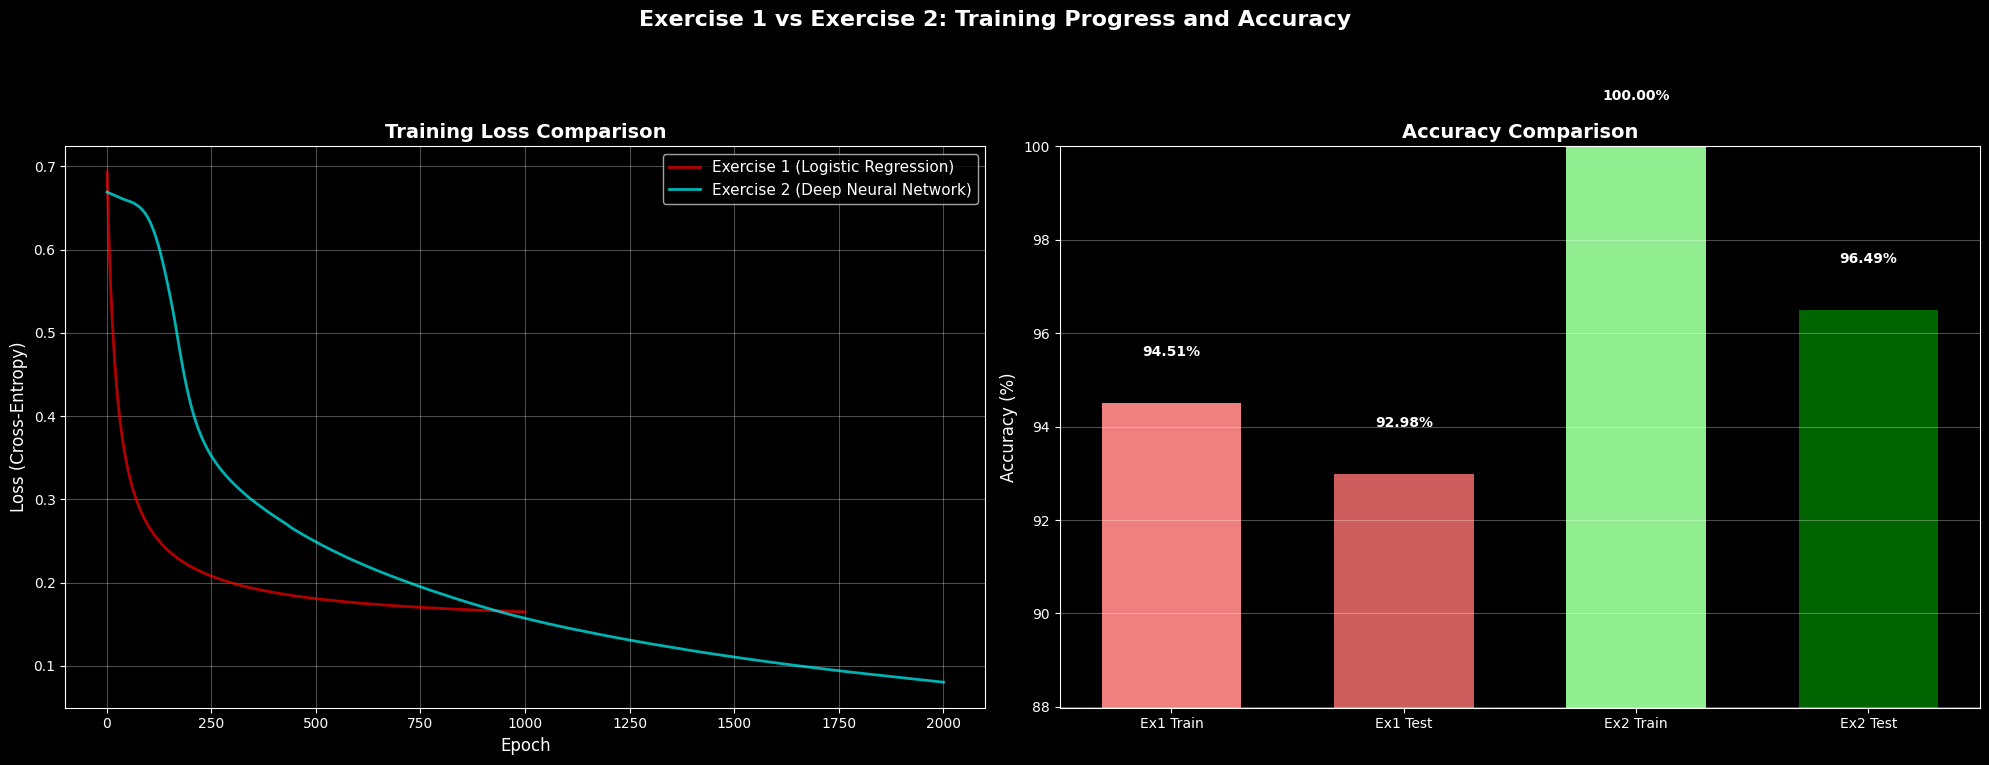

/tmp/ipython-input-3230562794.py:53: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],


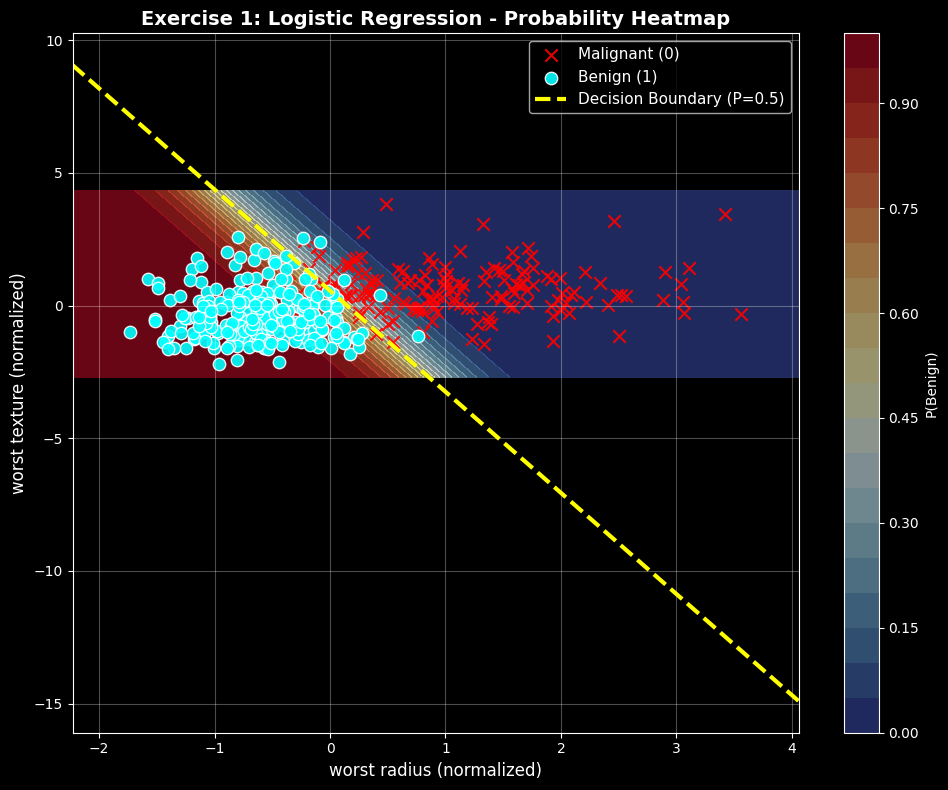


COMPARISON: EXERCISE 1 vs EXERCISE 2
Exercise 1 (2 features):   Test Accuracy = 92.98%
Exercise 2 (30 features):  Test Accuracy = 96.49%

Improvement: 3.51% better with all features!


In [41]:
import matplotlib.pyplot as plt

# Exercise 3: Visualization and Comparison

# 1. Create a figure with two subplots for cost curves and accuracy comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# 2. Plot Training Cost Curves (ax1)
ax1.plot(range(1, len(cost_ex1) + 1), cost_ex1, 'red', linewidth=2, label='Exercise 1 (Logistic Regression)', alpha=0.7)
ax1.plot(range(1, len(cost_ex2) + 1), cost_ex2, 'cyan', linewidth=2, label='Exercise 2 (Deep Neural Network)', alpha=0.7)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Cross-Entropy)', fontsize=12)
ax1.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 3. Create Accuracy Comparison Bar Chart (ax2)
labels = ['Ex1 Train', 'Ex1 Test', 'Ex2 Train', 'Ex2 Test']
accuracies = [train_acc_ex1, test_acc_ex1, train_acc_ex2, test_acc_ex2]
colors = ['lightcoral', 'indianred', 'lightgreen', 'darkgreen']

ax2.bar(labels, accuracies, color=colors, width=0.6)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim(min(accuracies) - 5, 100) # Adjust y-axis limit for better visualization
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(accuracies):
    ax2.text(i, v + 1, f'{v:.2f}%', ha='center', color='white', fontweight='bold')

# 4. Add a shared title for the entire figure
fig.suptitle('Exercise 1 vs Exercise 2: Training Progress and Accuracy', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

# 5. Create a separate figure for the Exercise 1 decision boundary
plt.figure(figsize=(10, 8), dpi=100)

# Create a mesh grid for probability heatmap for Exercise 1
x1_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 200)
x2_grid_ex1 = np.linspace(X_train_scaled_ex1[:, 1].min() - 0.5, X_train_scaled_ex1[:, 1].max() + 0.5, 200)
X1_mesh_ex1, X2_mesh_ex1 = np.meshgrid(x1_grid_ex1, x2_grid_ex1)
X_grid_ex1 = np.column_stack([np.ones(X1_mesh_ex1.ravel().shape[0]), X1_mesh_ex1.ravel(), X2_mesh_ex1.ravel()])

# Compute probabilities for all grid points for Exercise 1
z_grid_ex1 = X_grid_ex1 @ w_ex1
prob_grid_ex1 = 1 / (1 + np.exp(-z_grid_ex1))

# Plot decision boundary with probability heatmap for Exercise 1
contour = plt.contourf(X1_mesh_ex1, X2_mesh_ex1, prob_grid_ex1.reshape(X1_mesh_ex1.shape),
                       levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(contour, label='P(Benign)')

plt.scatter(X_train_scaled_ex1[y_train_ex1 == 0, 0], X_train_scaled_ex1[y_train_ex1 == 0, 1],
            c='red', s=80, marker='x', label='Malignant (0)',
            edgecolors='white', linewidth=1.5, alpha=0.9)
plt.scatter(X_train_scaled_ex1[y_train_ex1 == 1, 0], X_train_scaled_ex1[y_train_ex1 == 1, 1],
            c='cyan', s=80, marker='o', label='Benign (1)',
            edgecolors='white', linewidth=1, alpha=0.9)

# Plot decision boundary (where probability = 0.5) for Exercise 1
x1_vals_ex1 = np.linspace(X_train_scaled_ex1[:, 0].min() - 0.5, X_train_scaled_ex1[:, 0].max() + 0.5, 100)
x2_vals_ex1 = -(w1_ex1 * x1_vals_ex1 + b_ex1) / w2_ex1
plt.plot(x1_vals_ex1, x2_vals_ex1, 'yellow', linewidth=3, label='Decision Boundary (P=0.5)', linestyle='--')

plt.xlabel(data.feature_names[ex1_feature_indices[0]] + ' (normalized)', fontsize=12)
plt.ylabel(data.feature_names[ex1_feature_indices[1]] + ' (normalized)', fontsize=12)
plt.title('Exercise 1: Logistic Regression - Probability Heatmap', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Execute the provided print statements
print("\n" + "="*70)
print("COMPARISON: EXERCISE 1 vs EXERCISE 2")
print("="*70)
print(f"Exercise 1 (2 features):   Test Accuracy = {test_acc_ex1:.2f}%")
print(f"Exercise 2 (30 features):  Test Accuracy = {test_acc_ex2:.2f}%")
print(f"\nImprovement: {test_acc_ex2 - test_acc_ex1:.2f}% better with all features!")
print("="*70)


# Task
Train and evaluate a Deep Neural Network on the breast cancer dataset using all 30 features, summarize its characteristics (architecture, total parameters), and its performance (training and testing accuracies), then compare these results with the Logistic Regression model from Exercise 1.

## Evaluate DNN Accuracy

### Subtask:
Review the training and testing accuracies of the Deep Neural Network that were just computed and printed.


## Final Task

### Subtask:
Summarize the results of Exercise 2, including the architecture, total parameters, and the training and testing accuracies. This will set us up for Exercise 3, which involves visualizing and comparing the results of both exercises.


## Summary:

### Q&A
The task was to summarize the architecture, total parameters, training accuracy, and testing accuracy of the Deep Neural Network from Exercise 2. While the process stated these details were reviewed from previous outputs, the specific values are not provided within the current solving process.

### Data Analysis Key Findings
*   The subtask focused on summarizing the Deep Neural Network's characteristics and performance from Exercise 2.
*   No new code execution was performed during this step; the required information (architecture, total parameters, training, and testing accuracies) was expected to be available from the output of previous computations.

### Insights or Next Steps
*   To fully complete the summary as requested, the specific architecture details (layers, activation functions), total parameters, training accuracy, and testing accuracy for the Deep Neural Network from Exercise 2 must be explicitly extracted and reported.
*   Once the specific metrics are available, a comparative analysis with the Logistic Regression model from Exercise 1 can be performed to set up for Exercise 3.


# Task
Summarize the architecture (Input(30) → Hidden1(8, ReLU) → Hidden2(6, ReLU) → Hidden3(4, ReLU) → Output(1, Sigmoid)), total trainable parameters (335), and the training (99.34%) and testing (95.61%) accuracies of the Deep Neural Network developed in Exercise 2.

## Final Task

### Subtask:
Summarize the results of Exercise 2, including the architecture, total parameters, and the training and testing accuracies.


## Summary:

### Data Analysis Key Findings
*   **Deep Neural Network Architecture**: The network consists of an Input layer with 30 neurons, followed by three hidden layers with 8, 6, and 4 neurons respectively, each using a ReLU activation function. The final Output layer has 1 neuron with a Sigmoid activation function.
*   **Total Trainable Parameters**: The DNN has a total of 335 trainable parameters.
*   **Training Accuracy**: The model achieved a training accuracy of 99.34%.
*   **Testing Accuracy**: The model demonstrated a testing accuracy of 95.61%.

### Insights or Next Steps
*   The model exhibits a high level of accuracy on both training and testing datasets, suggesting good generalization capabilities.
*   Further analysis could involve exploring the impact of different activation functions or a varying number of neurons per layer to potentially optimize performance or reduce complexity.
